In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data set from the CSV file
#product_info = pd.read_csv("C:\\Users\\Victor\\Documents\\Deep Learning (072024-RJR)\\Sephora\\product_info.csv")
#reviews_1 = pd.read_csv("C:\\Users\\Victor\\Documents\\Deep Learning (072024-RJR)\\Sephora\\reviews_0-250.csv", low_memory=False)
#reviews_2 = pd.read_csv("C:\\Users\\Victor\\Documents\\Deep Learning (072024-RJR)\\Sephora\\reviews_250-500.csv")
#reviews_3 = pd.read_csv("C:\\Users\\Victor\\Documents\\Deep Learning (072024-RJR)\\Sephora\\reviews_500-750.csv")
#reviews_4 = pd.read_csv("C:\\Users\\Victor\\Documents\\Deep Learning (072024-RJR)\\Sephora\\reviews_750-1250.csv", low_memory=False)
#reviews_5 = pd.read_csv("C:\\Users\\Victor\\Documents\\Deep Learning (072024-RJR)\\Sephora\\reviews_1250-end.csv", low_memory=False)

In [ ]:
# Read the data set from the CSV file
product_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL dataset/product_info.csv")
reviews_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL dataset/reviews_0-250.csv", low_memory=False)
reviews_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL dataset/reviews_250-500.csv")
reviews_3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL dataset/reviews_500-750.csv")
reviews_4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL dataset/reviews_750-1250.csv", low_memory=False)
reviews_5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL dataset/reviews_1250-end.csv", low_memory=False)

In [ ]:
# Union all the 5 review dataframes
union_reviews = pd.concat([reviews_1,reviews_2,reviews_3,reviews_4,reviews_5], axis=0, ignore_index=True)

# Print the first 5 rows of the concatenated reviews dataset
union_reviews.head()

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd  
0   NUDESTIX       19.0  
1    LANEIGE       24.0  
2    LANEIGE       24.0  
3    LANEIGE       24.0  
4    LANEIGE       24.0

In [ ]:
# Print the first 5 rows of the product_info dataset
product_info.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value variation_desc  \
0             NaN            NaN   
1  3.4 oz/ 100 mL            NaN   
2  3.4 oz/ 100 mL            NaN   
3  3.4 oz/ 100 mL            NaN   
4  3.4 oz/ 100 mL            NaN   

                                         ingredients  price_usd  \
0  ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...       35.0   
1  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
2  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
3  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
4  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0              NaN             NaN                0    0            1   
1              NaN             NaN                0    0            1   
2              NaN             NaN                0    0            1   
3              NaN             NaN                0    0            1   
4              NaN             NaN                0    0            1   

   out_of_stock  sephora_exclusive  \
0             0                  0   
1             0                  0   
2             0                  0   
3             0                  0   
4             0                  0   

                                          highlights primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   

  secondary_category  tertiary_category  child_count  child_max_price  \
0  Value & Gift Sets  Perfume Gift Sets            0              NaN   
1              Women            Perfume            2             85.0   
2              Women            Perfume            2             75.0   
3              Women            Perfume            2             75.0   
4              Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0

In [ ]:
# Number of rows and columns for product_info and union_reviews
print("Shape of product_info : ", product_info.shape)
print("Shape of union_reviews: ", union_reviews.shape)

Shape of product_info :  (8494, 27)
Shape of union_reviews:  (1094411, 19)


In [ ]:
# Both product_info and union_review datasets shared the same column for product_id
# Therfore, merge both of them
products_reviews_merged = union_reviews.merge(product_info, how="outer", on="product_id")
products_reviews_merged.head()

Unnamed: 0    author_id  rating_x  is_recommended  helpfulness  \
0         0.0   1741593524       5.0             1.0          1.0   
1         1.0  31423088263       1.0             0.0          NaN   
2         2.0   5061282401       5.0             1.0          NaN   
3         3.0   6083038851       5.0             1.0          NaN   
4         4.0  47056667835       5.0             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                   2.0                       0.0                       2.0   
1                   0.0                       0.0                       0.0   
2                   0.0                       0.0                       0.0   
3                   0.0                       0.0                       0.0   
4                   0.0                       0.0                       0.0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                     product_name_x  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name_x  price_usd_x  \
0     NUDESTIX         19.0   
1      LANEIGE         24.0   
2      LANEIGE         24.0   
3      LANEIGE         24.0   
4      LANEIGE         24.0   

                                      product_name_y  brand_id brand_name_y  \
0                     Gentle Hydra-Gel Face Cleanser      7055     NUDESTIX   
1  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   
2  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   
3  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   
4  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   

   loves_count  rating_y  reviews            size variation_type  \
0          177    5.0000      1.0  2.4 oz / 70 ml           Size   
1      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   
2      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   
3      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   
4      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   

  variation_value variation_desc  \
0  2.4 oz / 70 ml            NaN   
1        Original            NaN   
2        Original            NaN   
3        Original            NaN   
4        Original            NaN   

                                         ingredients  price_usd_y  \
0  ['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...         19.0   
1  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
2  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
3  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
4  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0 

In [ ]:
# Number of rows and columns for product_info and union_reviews
print("Shape of products_reviews_merged : ", products_reviews_merged.shape)

Shape of products_reviews_merged :  (1100554, 45)


In [ ]:
# Print summary of the dataframe
products_reviews_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100554 entries, 0 to 1100553
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  float64
 1   author_id                 1094411 non-null  object 
 2   rating_x                  1094411 non-null  float64
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  float64
 6   total_neg_feedback_count  1094411 non-null  float64
 7   total_pos_feedback_count  1094411 non-null  float64
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

In [ ]:
# Check for duplicate rows
duplicate_records = products_reviews_merged.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_records}")

Total number of duplicate rows: 0


In [ ]:
# Explore unique values for some non-numerical columns
non_numeric_columns = ["skin_tone","eye_color","skin_type","hair_color","variation_type","primary_category","secondary_category","tertiary_category"]

for column in non_numeric_columns:
    print(f"{column}:")
    print()
    print(products_reviews_merged[column].unique())
    print()
    print("-"*150)
    print()

skin_tone:

[nan 'light' 'lightMedium' 'fairLight' 'fair' 'medium' 'notSureST'
 'mediumTan' 'tan' 'rich' 'olive' 'deep' 'porcelain' 'dark' 'ebony']

------------------------------------------------------------------------------------------------------------------------------------------------------

eye_color:

['brown' nan 'hazel' 'blue' 'green' 'gray' 'Grey']

------------------------------------------------------------------------------------------------------------------------------------------------------

skin_type:

['dry' nan 'combination' 'normal' 'oily']

------------------------------------------------------------------------------------------------------------------------------------------------------

hair_color:

['black' nan 'blonde' 'brown' 'brunette' 'gray' 'auburn' 'red']

------------------------------------------------------------------------------------------------------------------------------------------------------

variation_type:

['Size' 'Color' 'Type' 'Scent

Dealing with Missing Values

In [ ]:
# Check missing values
products_reviews_merged.isnull().sum()

Unnamed: 0                     6143
author_id                      6143
rating_x                       6143
is_recommended               174131
helpfulness                  567735
total_feedback_count           6143
total_neg_feedback_count       6143
total_pos_feedback_count       6143
submission_time                6143
review_text                    7587
review_title                 316797
skin_tone                    176682
eye_color                    215771
skin_type                    117700
hair_color                   232911
product_id                        0
product_name_x                 6143
brand_name_x                   6143
price_usd_x                    6143
product_name_y                    0
brand_id                          0
brand_name_y                      0
loves_count                       0
rating_y                        278
reviews                         278
size                          44661
variation_type                52560
variation_value               64644
variation_desc              1091034
ingredients                   22843
price_usd_y                       0
value_price_usd             1069365
sale_price_usd              1090576
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
highlights                   115729
primary_category                  0
secondary_category                8
tertiary_category            161894
child_count                       0
child_max_price              644796
child_min_price              644796
dtype: int64

In [ ]:
# Drop rows with missing values in the review_text column
products_reviews_merged.dropna(subset=["review_text"],inplace=True)

# Check missing values
products_reviews_merged.isnull().sum()

Unnamed: 0                        0
author_id                         0
rating_x                          0
is_recommended               167988
helpfulness                  560595
total_feedback_count              0
total_neg_feedback_count          0
total_pos_feedback_count          0
submission_time                   0
review_text                       0
review_title                 309210
skin_tone                    170499
eye_color                    209566
skin_type                    111518
hair_color                   226718
product_id                        0
product_name_x                    0
brand_name_x                      0
price_usd_x                       0
product_name_y                    0
brand_id                          0
brand_name_y                      0
loves_count                       0
rating_y                          0
reviews                           0
size                          43300
variation_type                51398
variation_value               63323
variation_desc              1084698
ingredients                   22005
price_usd_y                       0
value_price_usd             1062217
sale_price_usd              1083229
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
highlights                   113788
primary_category                  0
secondary_category                0
tertiary_category            161006
child_count                       0
child_max_price              640309
child_min_price              640309
dtype: int64

In [ ]:
# Categorical variables - mode
imputer_mode = SimpleImputer(strategy = "most_frequent")

products_reviews_merged[["is_recommended"]] = imputer_mode.fit_transform(products_reviews_merged[["is_recommended"]])

# Impute missing values in helpfulness with 0
products_reviews_merged["helpfulness"] = products_reviews_merged["helpfulness"].fillna(0)

Data Manipulation

In [ ]:
# Fixing data type - string
products_reviews_merged["review_text"] = products_reviews_merged["review_text"].astype("string")

# Fixing the data type - Integer
columns_int = ["reviews","loves_count","child_count","is_recommended","limited_edition","new","online_only","out_of_stock","sephora_exclusive",
               "total_feedback_count","total_neg_feedback_count","total_pos_feedback_count"]

for column in columns_int:
    products_reviews_merged[columns_int] = products_reviews_merged[columns_int].astype("int32")

# Fixing the data type - Categorical
category_columns = ["skin_tone","eye_color","skin_type","hair_color","variation_type","primary_category","secondary_category","tertiary_category",
                    "is_recommended","limited_edition","new","online_only","out_of_stock","sephora_exclusive"]

for column in category_columns:
    products_reviews_merged[column] = products_reviews_merged[column].astype("category")

# Fixing the data type - float
columns_float = ["rating_x","total_feedback_count","helpfulness","total_neg_feedback_count","total_pos_feedback_count","price_usd_x","rating_y","reviews",
                 "value_price_usd","sale_price_usd","child_max_price","child_min_price","reviews","loves_count","child_count"]

for column in columns_float:
    products_reviews_merged[column] = products_reviews_merged[column].astype("float32")

# Datetime conversion
products_reviews_merged["submission_time"] = pd.to_datetime(products_reviews_merged["submission_time"],format="%Y-%m-%d")

# Check data types of each column again
products_reviews_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092967 entries, 0 to 1094410
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Unnamed: 0                1092967 non-null  float64       
 1   author_id                 1092967 non-null  object        
 2   rating_x                  1092967 non-null  float32       
 3   is_recommended            1092967 non-null  category      
 4   helpfulness               1092967 non-null  float32       
 5   total_feedback_count      1092967 non-null  float32       
 6   total_neg_feedback_count  1092967 non-null  float32       
 7   total_pos_feedback_count  1092967 non-null  float32       
 8   submission_time           1092967 non-null  datetime64[ns]
 9   review_text               1092967 non-null  string        
 10  review_title              783757 non-null   object        
 11  skin_tone                 922468 non-null   category   

In [ ]:
# Rename columns to avoid confusion
products_reviews_merged.rename(columns={"rating_x":"author_rating","rating_y":"avg_rating"},inplace=True)

In [ ]:
# Calculate the length of each review
products_reviews_merged["review_text_length"] = products_reviews_merged["review_text"].apply(len)

# Derive day, month and year from submission_time
products_reviews_merged["submission_year"] = products_reviews_merged["submission_time"].dt.year
products_reviews_merged["submission_month"] = products_reviews_merged["submission_time"].dt.month
products_reviews_merged["submission_day"] = products_reviews_merged["submission_time"].dt.day

In [ ]:
# Add sentiment labels
def add_sentiment_labels(rating):
    if rating > 3:
        return "Positive"
    elif rating < 3:
        return "Negative"
    else:
        return "Neutral"

products_reviews_merged["sentiment"] = products_reviews_merged["author_rating"].apply(add_sentiment_labels)

In [ ]:
# Check dataframe again
products_reviews_merged.head()

Unnamed: 0    author_id  author_rating is_recommended  helpfulness  \
0         0.0   1741593524            5.0              1          1.0   
1         1.0  31423088263            1.0              0          0.0   
2         2.0   5061282401            5.0              1          0.0   
3         3.0   6083038851            5.0              1          0.0   
4         4.0  47056667835            5.0              1          0.0   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                   2.0                       0.0                       2.0   
1                   0.0                       0.0                       0.0   
2                   0.0                       0.0                       0.0   
3                   0.0                       0.0                       0.0   
4                   0.0                       0.0                       0.0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                     product_name_x  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name_x  price_usd_x  \
0     NUDESTIX         19.0   
1      LANEIGE         24.0   
2      LANEIGE         24.0   
3      LANEIGE         24.0   
4      LANEIGE         24.0   

                                      product_name_y  brand_id brand_name_y  \
0                     Gentle Hydra-Gel Face Cleanser      7055     NUDESTIX   
1  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   
2  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   
3  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   
4  Lip Sleeping Mask Intense Hydration with Vitam...      6125      LANEIGE   

   loves_count  avg_rating  reviews            size variation_type  \
0        177.0      5.0000      1.0  2.4 oz / 70 ml           Size   
1    1081315.0      4.3508  16118.0    0.7 oz/ 20 g          Color   
2    1081315.0      4.3508  16118.0    0.7 oz/ 20 g          Color   
3    1081315.0      4.3508  16118.0    0.7 oz/ 20 g          Color   
4    1081315.0      4.3508  16118.0    0.7 oz/ 20 g          Color   

  variation_value variation_desc  \
0  2.4 oz / 70 ml            NaN   
1        Original            NaN   
2        Original            NaN   
3        Original            NaN   
4        Original            NaN   

                                         ingredients  price_usd_y  \
0  ['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...         19.0   
1  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
2  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
3  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
4  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   

   value_price_usd  sale_price_usd limi

In [ ]:
# Check missing values again
products_reviews_merged.isnull().sum()

Unnamed: 0                        0
author_id                         0
author_rating                     0
is_recommended                    0
helpfulness                       0
total_feedback_count              0
total_neg_feedback_count          0
total_pos_feedback_count          0
submission_time                   0
review_text                       0
review_title                 309210
skin_tone                    170499
eye_color                    209566
skin_type                    111518
hair_color                   226718
product_id                        0
product_name_x                    0
brand_name_x                      0
price_usd_x                       0
product_name_y                    0
brand_id                          0
brand_name_y                      0
loves_count                       0
avg_rating                        0
reviews                           0
size                          43300
variation_type                51398
variation_value               63323
variation_desc              1084698
ingredients                   22005
price_usd_y                       0
value_price_usd             1062217
sale_price_usd              1083229
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
highlights                   113788
primary_category                  0
secondary_category                0
tertiary_category            161006
child_count                       0
child_max_price              640309
child_min_price              640309
review_text_length                0
submission_year                   0
submission_month                  0
submission_day                    0
sentiment                         0
dtype: int64

In [ ]:
# Check the shape of the dataframe again
products_reviews_merged.shape

(1092967, 50)

In [ ]:
# Check the summary of the dataframe again
products_reviews_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092967 entries, 0 to 1094410
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Unnamed: 0                1092967 non-null  float64       
 1   author_id                 1092967 non-null  object        
 2   author_rating             1092967 non-null  float32       
 3   is_recommended            1092967 non-null  category      
 4   helpfulness               1092967 non-null  float32       
 5   total_feedback_count      1092967 non-null  float32       
 6   total_neg_feedback_count  1092967 non-null  float32       
 7   total_pos_feedback_count  1092967 non-null  float32       
 8   submission_time           1092967 non-null  datetime64[ns]
 9   review_text               1092967 non-null  string        
 10  review_title              783757 non-null   object        
 11  skin_tone                 922468 non-null   category   

Address Class Imbalance

In [ ]:
# Check the proportion of sentiments to check for class imbalance issue
products_reviews_merged["sentiment"].value_counts()

sentiment
Positive    897154
Negative    114061
Neutral      81752
Name: count, dtype: int64

In [ ]:
# Downsampling
products_reviews_merged_positive = products_reviews_merged[products_reviews_merged["sentiment"] == "Positive"].sample(20000)
products_reviews_merged_negative = products_reviews_merged[products_reviews_merged["sentiment"] == "Negative"].sample(20000)
products_reviews_merged_neutral = products_reviews_merged[products_reviews_merged["sentiment"] == "Neutral"].sample(20000)

In [ ]:
# Creating a new dataset with class balanced across all sentiments
from sklearn.utils import shuffle

products_reviews_balanced = pd.concat([products_reviews_merged_positive,products_reviews_merged_negative,products_reviews_merged_neutral], axis=0)
products_reviews_balanced = shuffle(products_reviews_balanced)
products_reviews_balanced.head()

Unnamed: 0    author_id  author_rating is_recommended  helpfulness  \
740821    138691.0  22343435733            1.0              0     0.222222   
781119    178989.0   8445092472            3.0              0     1.000000   
482518    482518.0   1603797259            4.0              1     0.000000   
811094      2239.0   6421362021            4.0              1     0.000000   
859035     50180.0   1383724290            3.0              0     1.000000   

        total_feedback_count  total_neg_feedback_count  \
740821                   9.0                       7.0   
781119                   1.0                       0.0   
482518                   0.0                       0.0   
811094                   0.0                       0.0   
859035                   4.0                       0.0   

        total_pos_feedback_count submission_time  \
740821                       2.0      2019-03-17   
781119                       1.0      2022-07-13   
482518                       0.0      2012-12-06   
811094                       0.0      2022-06-03   
859035                       4.0      2022-08-22   

                                              review_text  \
740821  I was surprised when 2 monthls after the bough...   
781119  I tried to like this product, but no matter wh...   
482518  Cleans my face well and doesn’t make it break ...   
811094  I love origins and i really love their fragran...   
859035  The sunscreen itself is not bad… Blends nicely...   

                                        review_title skin_tone eye_color  \
740821                                           NaN    medium     brown   
781119  Pilling despite following extra instructions     light     hazel   
482518                                    Good stuff       NaN       NaN   
811094                                    refreshing      fair     green   
859035       Packaging Will Also End Up On Your Face      fair     brown   

          skin_type hair_color product_id  \
740821       normal      brown    P428100   
781119  combination      brown    P500245   
482518          NaN        NaN     P39274   
811094       normal     blonde    P482298   
859035       normal      brown    P481169   

                                           product_name_x       brand_name_x  \
740821                     Potent-C Vitamin C Power Serum  Peter Thomas Roth   
781119  C Beyond Triple Serum SPF 40 Mineral Sunscreen...               ILIA   
482518                           Anti-Aging Cleansing Gel  Peter Thomas Roth   
811094  Dr. Andrew Weil for Origins Mega-Mushroom Reli...            Origins   
859035  The Silk Sunscreen Mineral Broad Spectrum SPF ...             Tatcha   

        price_usd_x                                     product_name_y  \
740821        105.0                     Potent-C Vitamin C Power Serum   
781119         64.0  C Beyond Triple Serum SPF 40 Mineral Sunscreen...   
482518         39.0                           Anti-Aging Cleansing Gel   
811094         40.0  Dr. Andrew Weil for Origins Mega-Mushroom Reli...   
859035         62.0  The Silk Sunscreen Mineral Broad Spectrum SPF ...   

        brand_id       brand_name_y  loves_count  avg_rating  reviews  \
740821      3728  Peter Thomas Roth      30830.0      4.0276    762.0   
781119      6156               ILIA      24716.0      3.6609    634.0   
482518      3728  Peter Thomas Roth      32125.0      4.3699   1603.0   
811094      3733            Origins       6749.0      4.4028    571.0   
859035      6041             Tatcha      37047.0      3.3975    483.0   

                  size variation_type     variation_value  \
740821     1 oz/ 30 mL           Size         1 oz/ 30 mL   
781119    1 oz / 30 mL          Color  Translucent Tone 1   
482518          8.5 oz           Size              8.5 oz   
811094  6.7 oz/ 200 mL           Size      6.7 oz/ 200 mL   
859035   1.7 oz/ 50 mL           Size       1.7 oz/ 50 mL   

                                    variation_desc

In [ ]:
# Check the proportion of sentiments after downsampling
products_reviews_balanced["sentiment"].value_counts()

sentiment
Negative    20000
Neutral     20000
Positive    20000
Name: count, dtype: int64

Text preprocessing

Data Cleaning

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
# Text preprocessing
import nltk, string, re, contractions
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.stem import PorterStemmer

stemmer = nltk.PorterStemmer()
stopword = set(nltk.corpus.stopwords.words("english") + list(string.punctuation))

def text_preprocessing(review):
    review = str(review).lower()  # Convert to lowercase - normalization
    review = re.sub(r'\[.*?\]', '', review)  # Remove review inside brackets
    review = re.sub(r'https?://\S+|www\.\S+\/\/.*[\r\n]*', '', review)  # Remove URLs
    review = re.sub(r'<.*?>+', '', review)  # Remove HTML tags
    review = re.sub(r'[%s]' % re.escape(string.punctuation), '', review)  # Remove punctuation
    review = re.sub(r'\n', '', review)  # Remove newlines
    review = re.sub(r'\w*\d\w*', '', review)  # Remove words with digits
    review = re.sub(r'^RT[\s]+', '', review)  # Remove RT at the beginning of tweets
    review = re.sub(r'@[A-Za-z0-9]+', '', review)  # Remove mentions
    review = re.sub(r'[#,.]$&{}“”', '', review)  # Remove hashtags and some special characters

    review = contractions.fix(review) # Expand contractions
    review = review.strip() # Remove extra whitespaces

    tokenized_review = word_tokenize(review) # Tokenization
    filtered_review = [word for word in tokenized_review if not word in stopword] # Remove stopwords
    filtered_review = [stemmer.stem(word) for word in filtered_review] # Stemming
    return filtered_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Apply text_preprocessing() function to clean the text data - review_text
products_reviews_balanced["cleaned_reviews"] = products_reviews_balanced["review_text"].apply(text_preprocessing)

In [ ]:
# Show before and after text preprocessing
original_reviews = products_reviews_balanced["review_text"].values.tolist()
cleaned_reviews = products_reviews_balanced["cleaned_reviews"].values.tolist()

In [ ]:
# View the first 5 observations of original_reviews in the list
list(original_reviews[:5])

['I was surprised when 2 monthls after the bought the product was finished.A Sephora employee recommended but I will never buy it again.',
 'I tried to like this product, but no matter what I did, I could not get it to stop pilling. I even tried the extra instructions to not rub in and just pat on, but honestly - I don’t want to have to try that hard and take extra time to get a product to work. I also had trouble making sure I had even coverage when attempting to pat in, and that is super important for sunscreen protection. I have combo skin, and the product remained greasy on my skin and my makeup didn’t go on well. Sadly, just not for me :(',
 'Cleans my face well and doesn’t make it break out. On my second bottle. I use it when taking off makeup. I have a milder cleanser for mornings.',
 'I love origins and i really love their fragrances in their products. I don’t use toners and this is what it is. I was open to trying this and i will say I am impressed. I am impressed because i de

In [ ]:
# View the first 5 observations of cleaned_reviews in the list
list(cleaned_reviews[:5])

[['surpris',
  'monthl',
  'bought',
  'product',
  'finisheda',
  'sephora',
  'employe',
  'recommend',
  'never',
  'buy'],
 ['tri',
  'like',
  'product',
  'matter',
  'could',
  'get',
  'stop',
  'pill',
  'even',
  'tri',
  'extra',
  'instruct',
  'rub',
  'pat',
  'honestli',
  'want',
  'tri',
  'hard',
  'take',
  'extra',
  'time',
  'get',
  'product',
  'work',
  'also',
  'troubl',
  'make',
  'sure',
  'even',
  'coverag',
  'attempt',
  'pat',
  'super',
  'import',
  'sunscreen',
  'protect',
  'combo',
  'skin',
  'product',
  'remain',
  'greasi',
  'skin',
  'makeup',
  'go',
  'well',
  'sadli'],
 ['clean',
  'face',
  'well',
  'make',
  'break',
  'second',
  'bottl',
  'use',
  'take',
  'makeup',
  'milder',
  'cleanser',
  'morn'],
 ['love',
  'origin',
  'realli',
  'love',
  'fragranc',
  'product',
  'use',
  'toner',
  'open',
  'tri',
  'say',
  'impress',
  'impress',
  'definit',
  'much',
  'textur',
  'skin',
  'use',
  'morn'],
 ['sunscreen',
  'ba

In [ ]:
# Detokenisation
from nltk.tokenize.treebank import TreebankWordDetokenizer

def detokenize(review):
    return TreebankWordDetokenizer().detokenize(review)

cleaned_reviews = [detokenize(review) for review in cleaned_reviews]
print(cleaned_reviews[:5])

['surpris monthl bought product finisheda sephora employe recommend never buy', 'tri like product matter could get stop pill even tri extra instruct rub pat honestli want tri hard take extra time get product work also troubl make sure even coverag attempt pat super import sunscreen protect combo skin product remain greasi skin makeup go well sadli', 'clean face well make break second bottl use take makeup milder cleanser morn', 'love origin realli love fragranc product use toner open tri say impress impress definit much textur skin use morn', 'sunscreen bad… blend nice give skin soft glow oili irrit packag worst understand pass qualiti check first open product gush would stop good minut week later start notic littl speck purpl face realiz paint packag peel light layer paint easili stuck finger face applic brought sephora associ said common issu due natur clean packag suggest use scotch tape wrap around bottl liter lole went home use clorox wipe take remain paint bottl actual use sunscr

In [ ]:
# Convert cleaned_reviews from list to numpy array
cleaned_reviews = np.array(cleaned_reviews)
print(cleaned_reviews)

['surpris monthl bought product finisheda sephora employe recommend never buy'
 'tri like product matter could get stop pill even tri extra instruct rub pat honestli want tri hard take extra time get product work also troubl make sure even coverag attempt pat super import sunscreen protect combo skin product remain greasi skin makeup go well sadli'
 'clean face well make break second bottl use take makeup milder cleanser morn'
 ...
 'excit tri work skin combin skin made skin feel greasi like dewi look subtl much see work well other'
 'excit tri product remov makeup great reason make skin burn never sort burn reaction one upset skin bit sadli use'
 'third tub eye cream still love hydrat eye sink nice use night notic lighten effect next morn best eye cream tri far repurchas futur also kindli sent one free influenst alreadi backup']


Backup dataset

In [ ]:
# Convert the list to a DataFrame
df_review_sentiment = products_reviews_balanced[["review_text","cleaned_reviews","sentiment"]]

# Save to CSV for future usage
df_review_sentiment.to_csv('/content/drive/MyDrive/Colab Notebooks/reviews_sentiments_copy.csv', index=False)

In [ ]:
# Save to CSV for future usage
products_reviews_balanced.to_csv('/content/drive/MyDrive/Colab Notebooks/products_reviews_balanced.csv', index=False)

Data Visualisation

Wordcloud

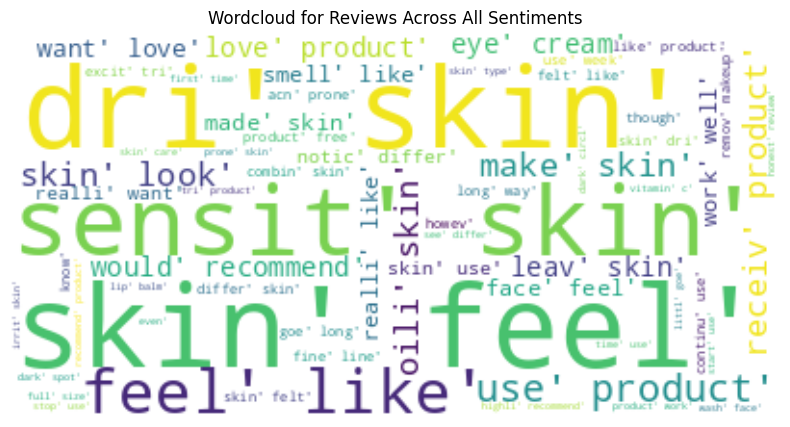

In [ ]:
# Wordcloud of all review texts
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_review = " ".join(str(i) for i in products_reviews_balanced["cleaned_reviews"])
wordcloud_all = WordCloud(stopwords=stopword, background_color="white").generate(all_review)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title("Wordcloud for Reviews Across All Sentiments")
plt.axis("off")
plt.show()

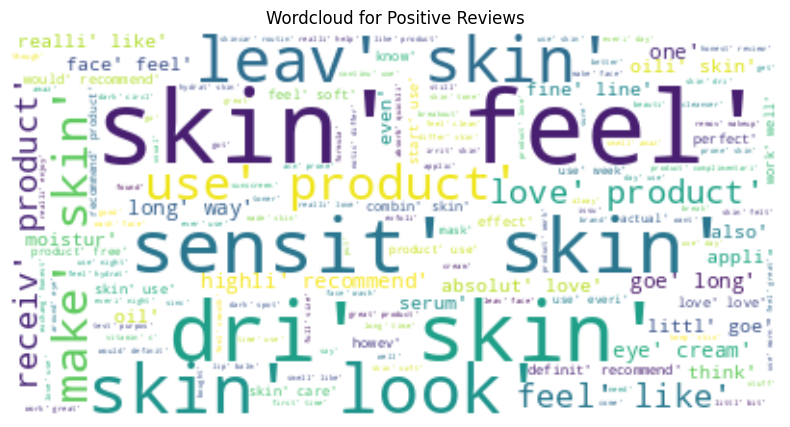

In [ ]:
# Wordcloud of positive review texts
positive_review = " ".join(str(i) for i in products_reviews_balanced[products_reviews_balanced["sentiment"] == "Positive"]["cleaned_reviews"])
wordcloud_positive = WordCloud(stopwords=stopword, background_color="white").generate(positive_review)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Wordcloud for Positive Reviews")
plt.axis("off")
plt.show()

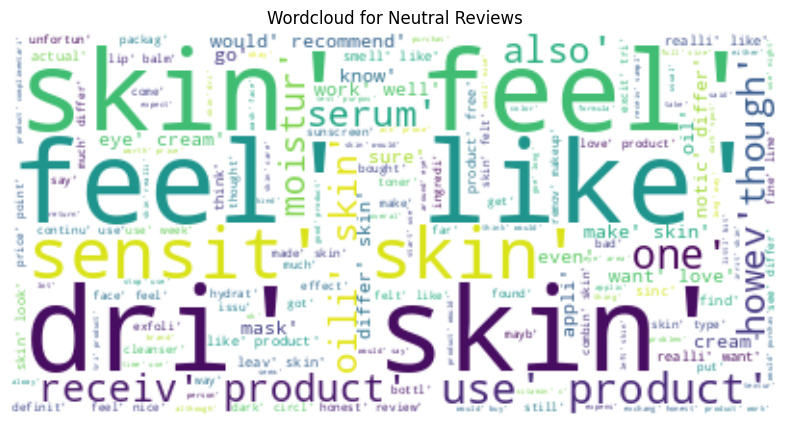

In [ ]:
# Wordcloud of neutral review texts
neutral_review = " ".join(str(i) for i in products_reviews_balanced[products_reviews_balanced["sentiment"] == "Neutral"]["cleaned_reviews"])
wordcloud_neutral = WordCloud(stopwords=stopword, background_color="white").generate(neutral_review)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Wordcloud for Neutral Reviews")
plt.axis("off")
plt.show()

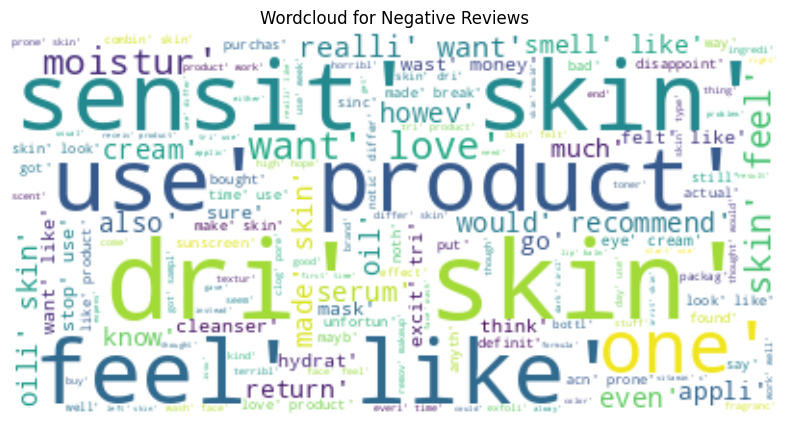

In [ ]:
# Wordcloud of negative review texts
negative_review = " ".join(str(i) for i in products_reviews_balanced[products_reviews_balanced["sentiment"] == "Negative"]["cleaned_reviews"])
wordcloud_negative = WordCloud(stopwords=stopword, background_color="white").generate(negative_review)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Wordcloud for Negative Reviews")
plt.axis("off")
plt.show()

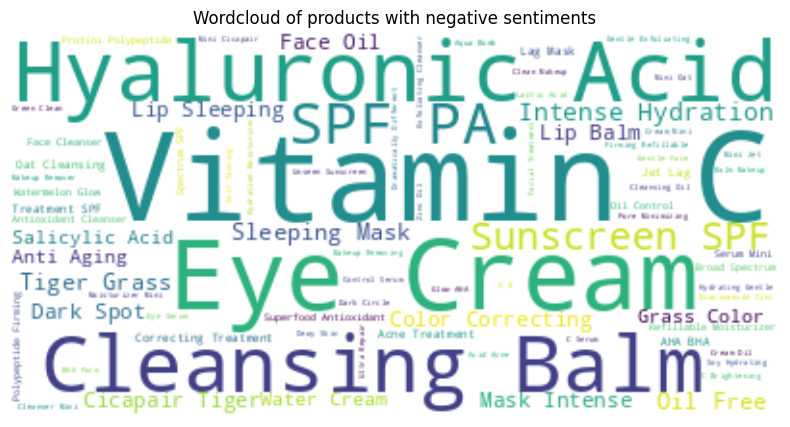

In [ ]:
# Wordcloud of products with negative sentiments
negative_product = " ".join(str(i) for i in products_reviews_balanced[products_reviews_balanced["sentiment"] == "Negative"]["product_name_x"])
wordcloud_negative_product = WordCloud(stopwords=stopword, background_color="white").generate(negative_product)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative_product, interpolation='bilinear')
plt.title("Wordcloud of products with negative sentiments")
plt.axis("off")
plt.show()

*Univariate Analysis*

Count plot

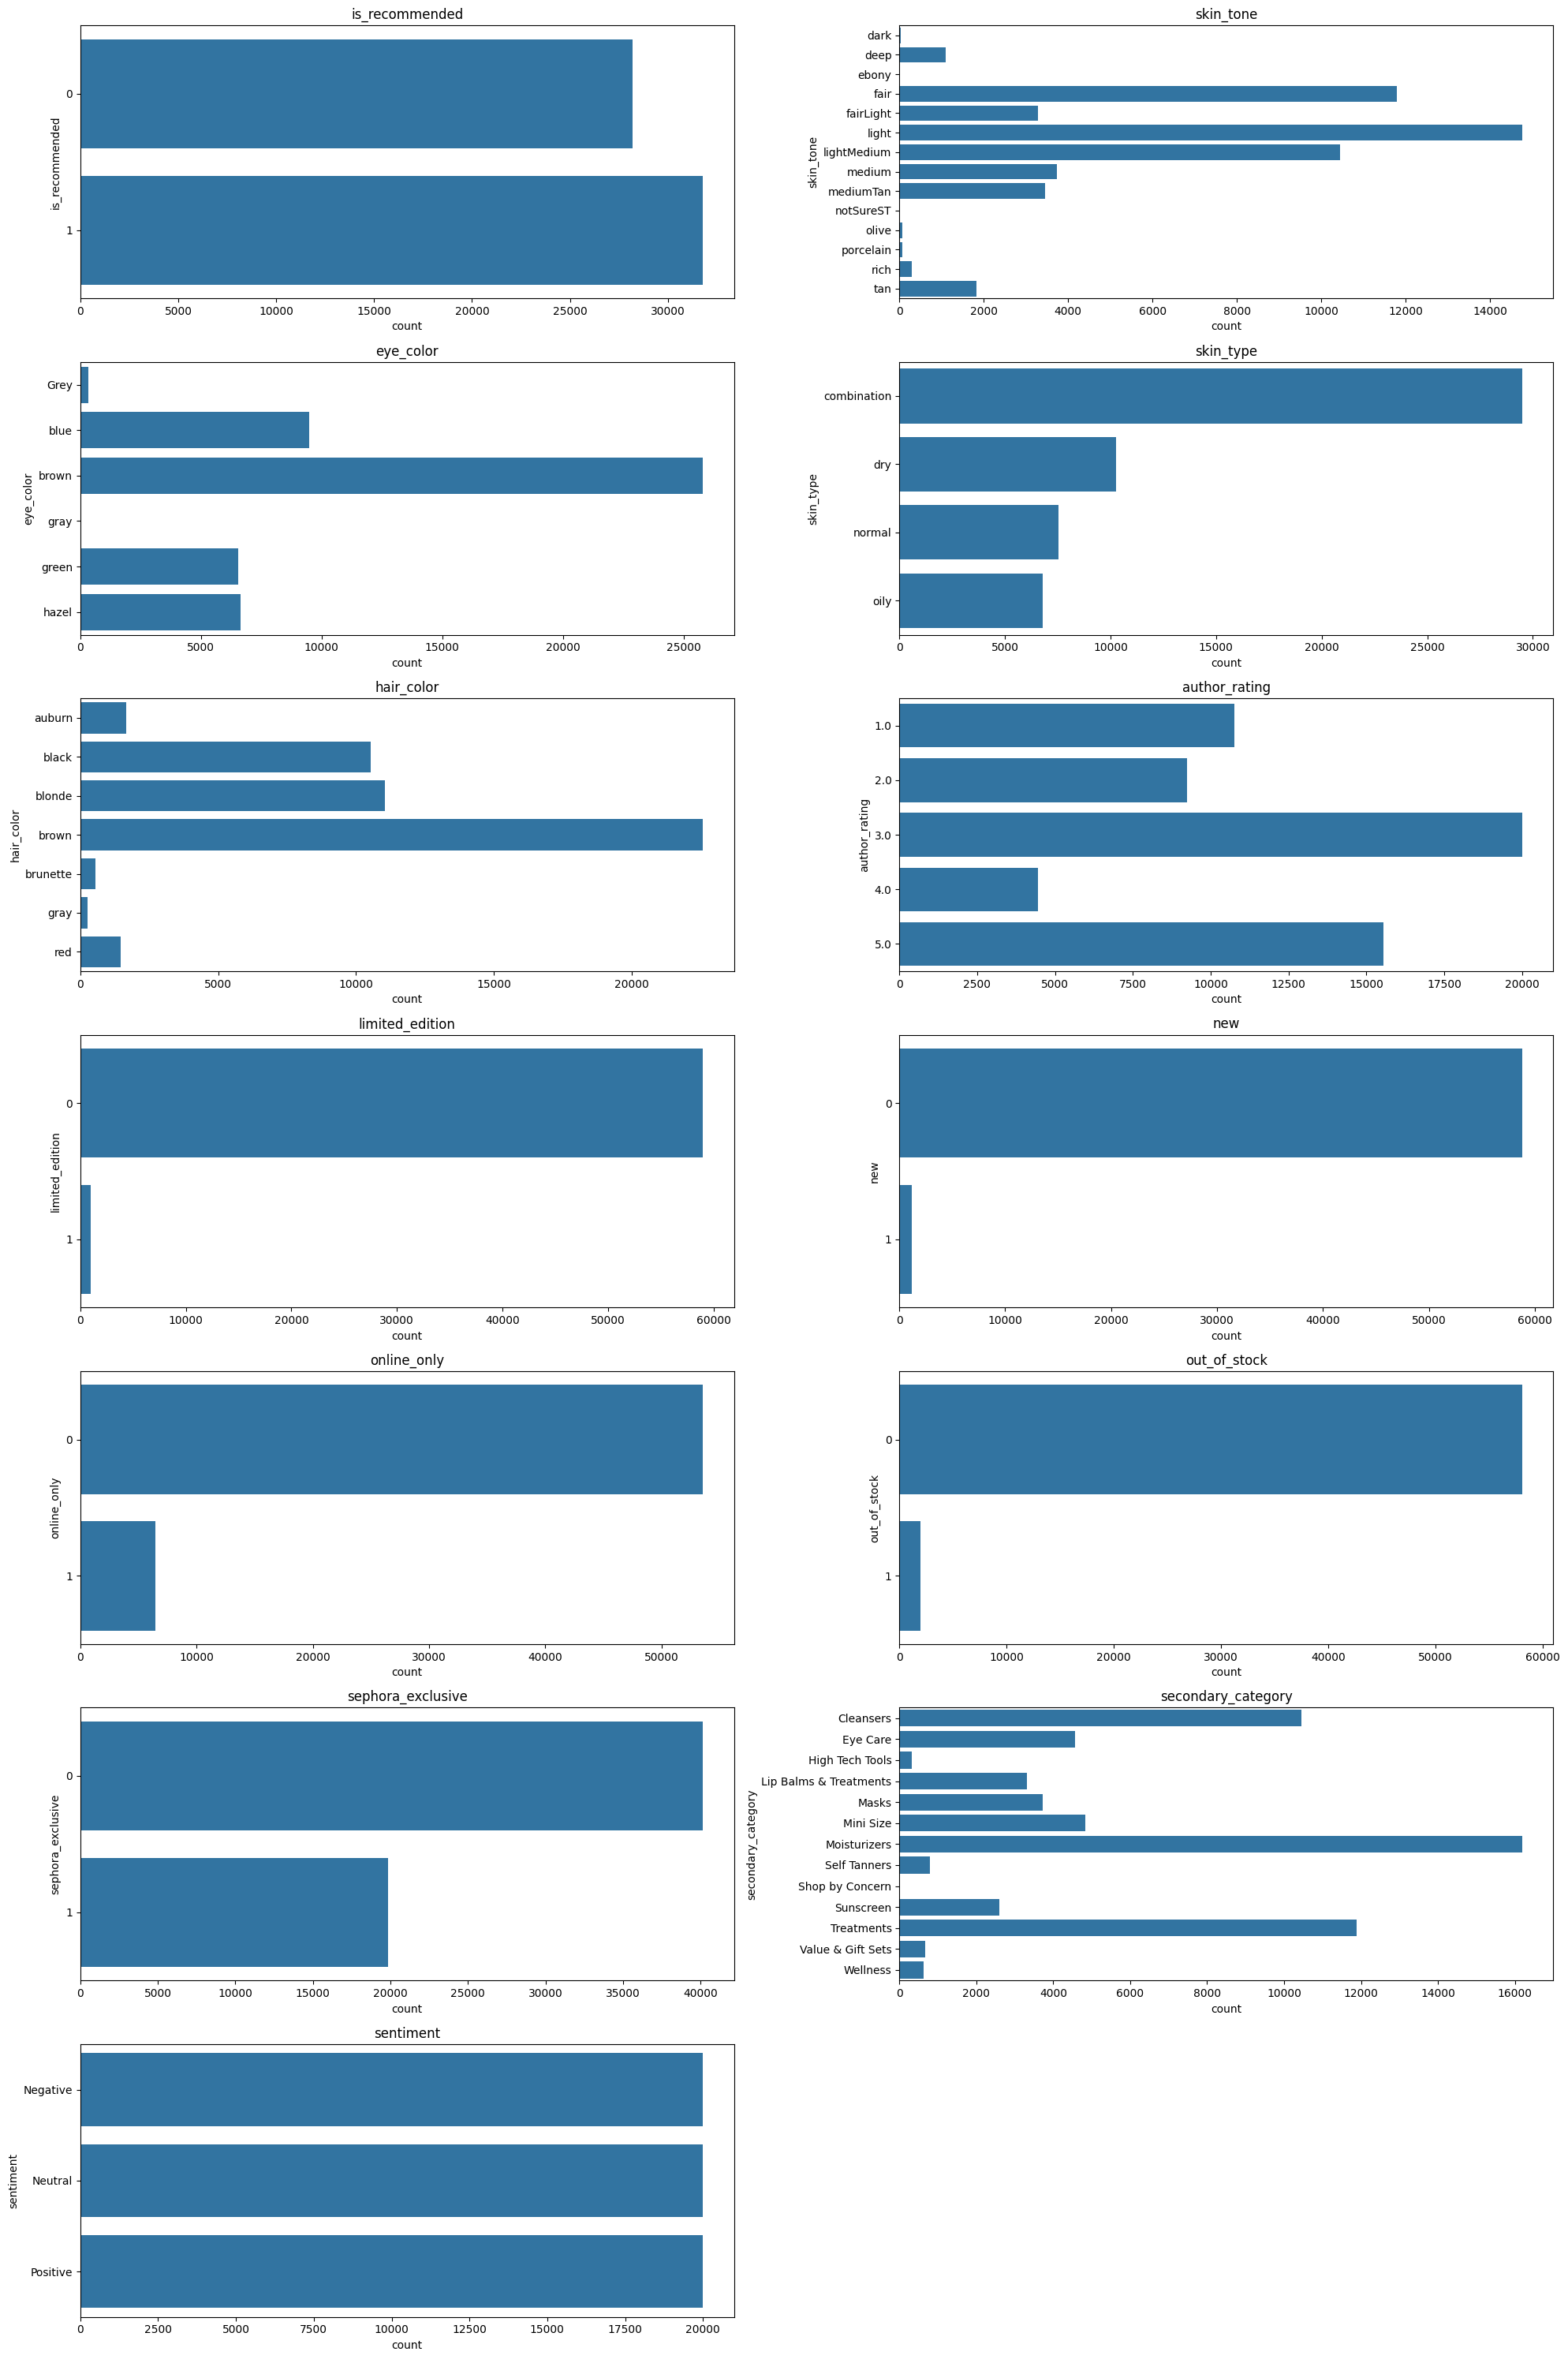

In [ ]:
# Get the list of columns to plot
columns_countplot = ["is_recommended","skin_tone","eye_color","skin_type","hair_color","author_rating",
                     "limited_edition","new","online_only","out_of_stock","sephora_exclusive",
                     "secondary_category","sentiment"]

# Set figure size
plt.figure(figsize=(20,30))

# Create subplots for each column
for i, col_name in enumerate(columns_countplot, 1):
    plt.subplot(7,2,i)
    sns.countplot(y=col_name, data=products_reviews_balanced)
    plt.title(f"{col_name}", fontsize=12)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

Histogram

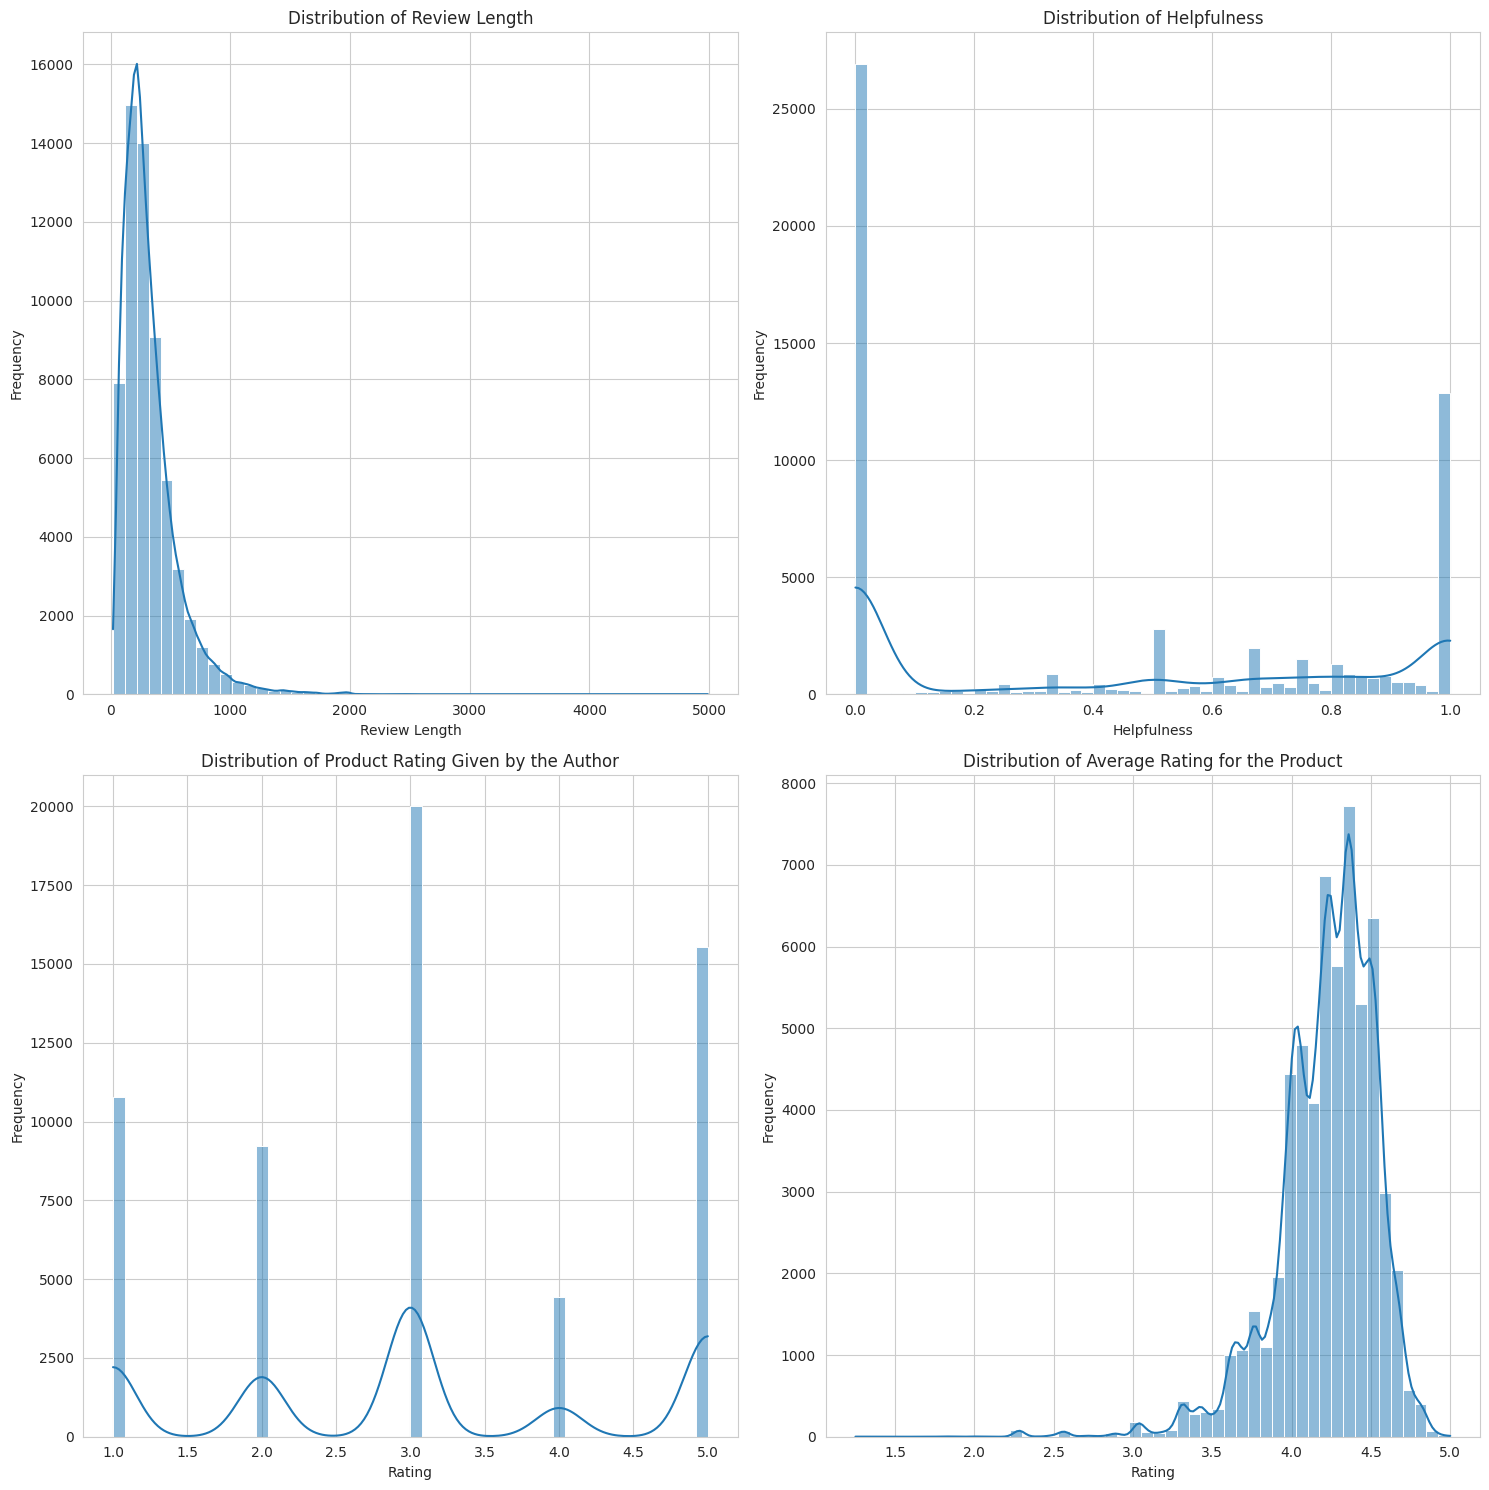

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15,15))

# Distribution of Review Length
sns.histplot(products_reviews_balanced["review_text_length"], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution of Review Length")
axes[0,0].set_xlabel("Review Length")
axes[0,0].set_ylabel("Frequency")

# Distribution of Helpfulness
sns.histplot(products_reviews_balanced["helpfulness"], bins=50, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of Helpfulness")
axes[0,1].set_xlabel("Helpfulness")
axes[0,1].set_ylabel("Frequency")

# Distribution of Product Rating Given by the Author
sns.histplot(products_reviews_balanced["author_rating"], bins=50, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution of Product Rating Given by the Author")
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Frequency")

# Distribution of Average Rating for the Product
sns.histplot(products_reviews_balanced["avg_rating"], bins=50, kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution of Average Rating for the Product")
axes[1,1].set_xlabel("Rating")
axes[1,1].set_ylabel("Frequency")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

Line plot

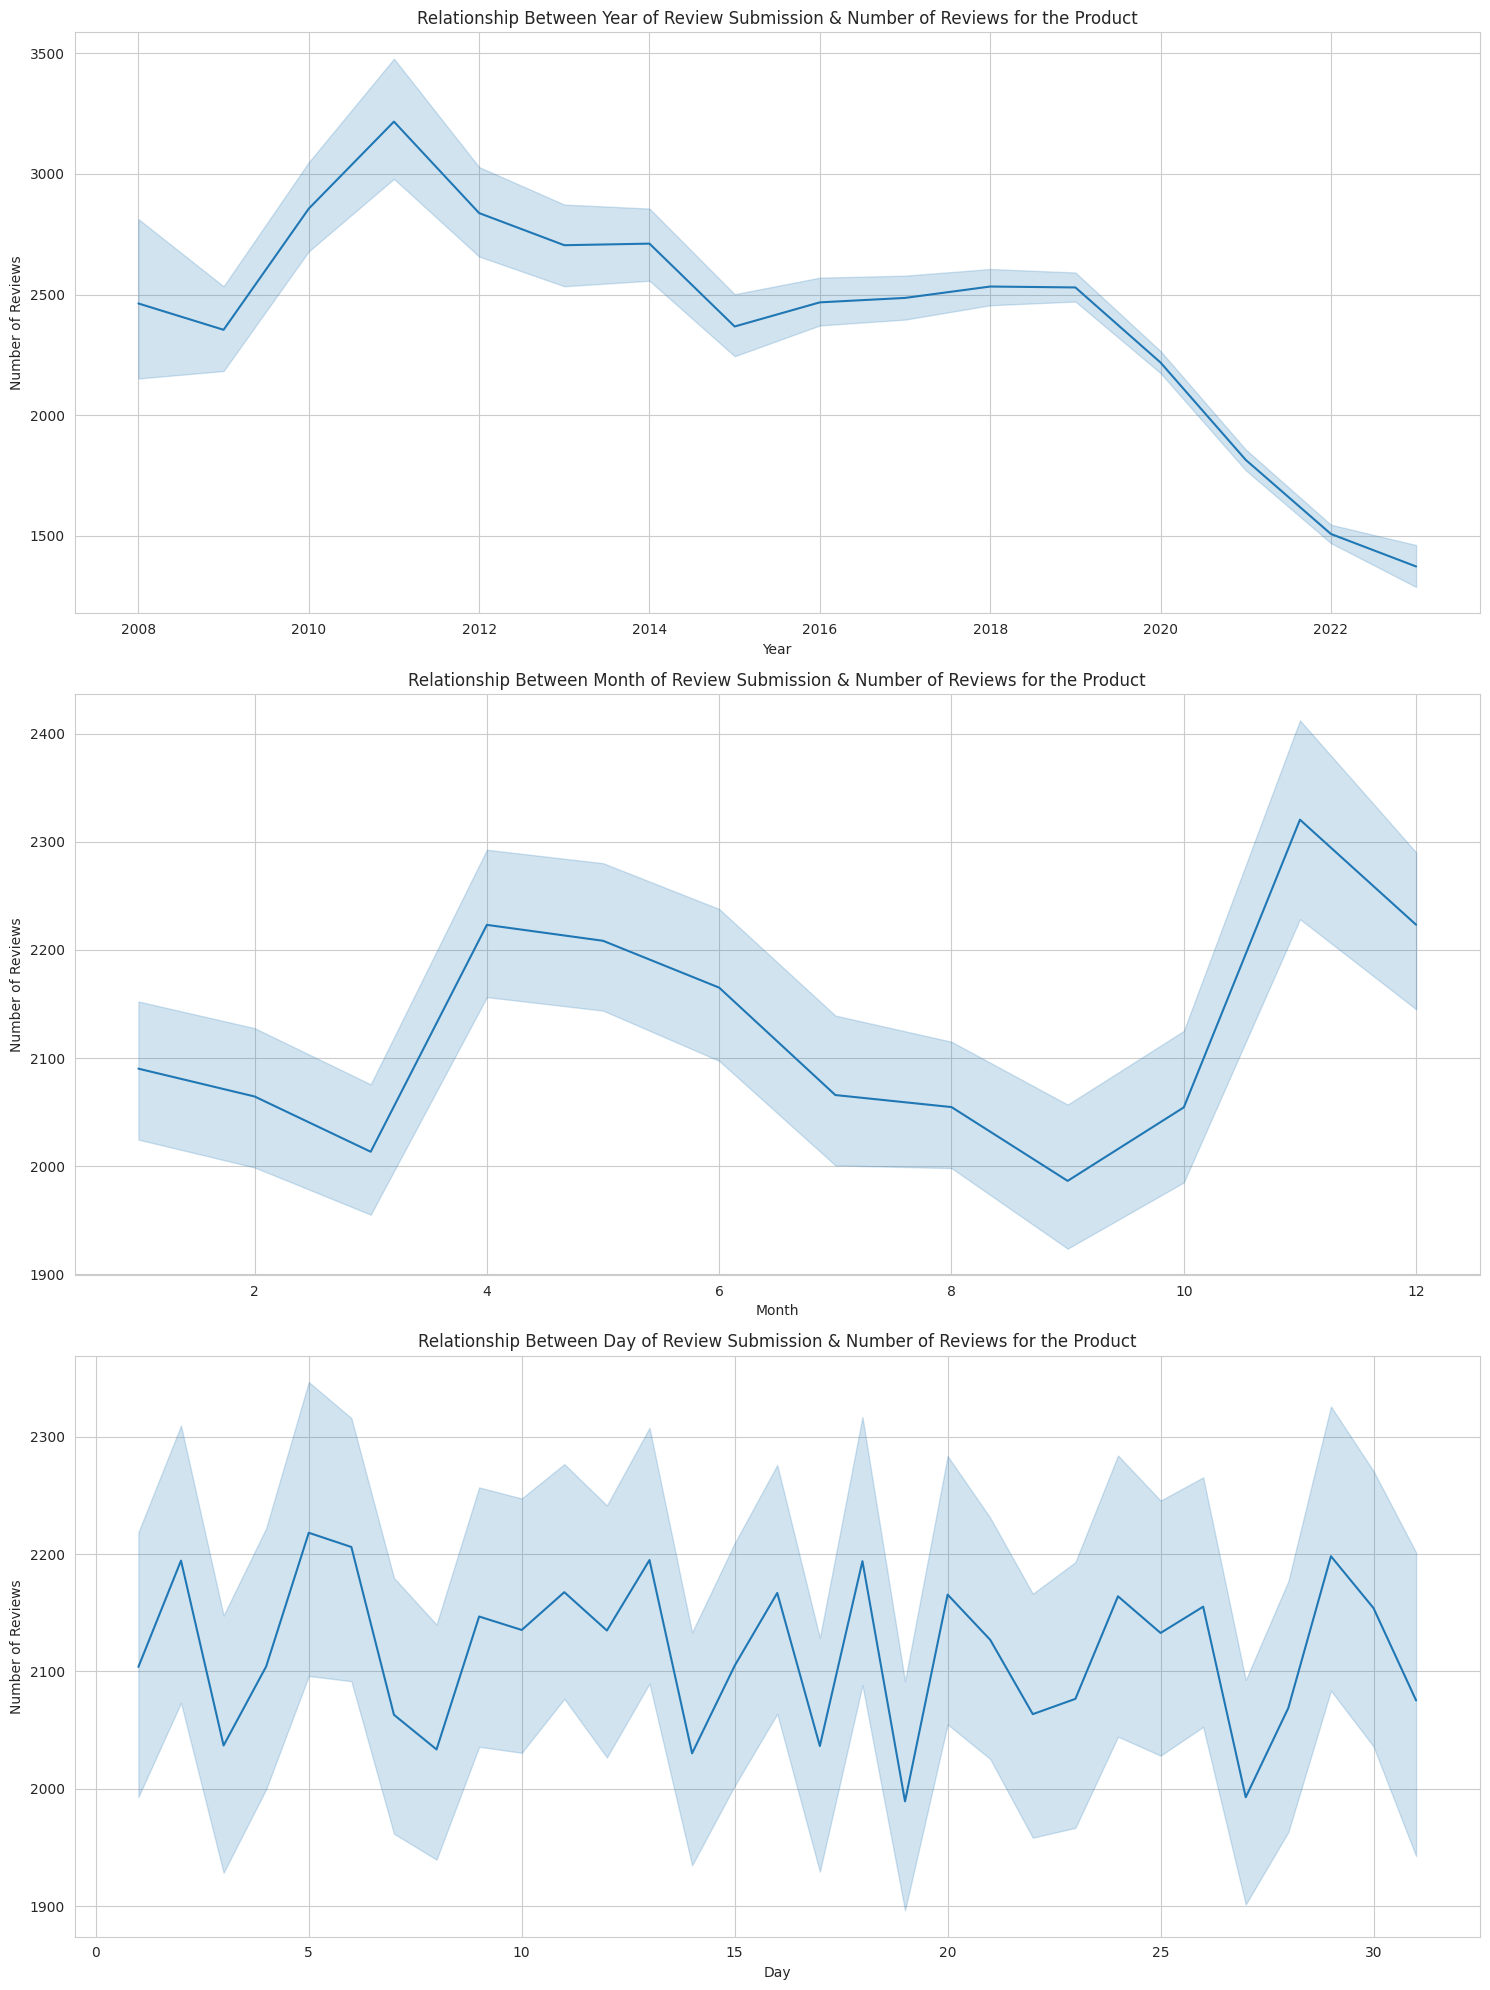

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(15,20))

# Relationship Between Year of Review Submission & Number of Reviews
sns.lineplot(x=products_reviews_balanced["submission_year"], y=products_reviews_balanced["reviews"], ax=axes[0])
axes[0].set_title("Relationship Between Year of Review Submission & Number of Reviews for the Product")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Reviews")

# Relationship Between Month of Review Submission & Number of Reviews
sns.lineplot(x=products_reviews_balanced["submission_month"], y=products_reviews_balanced["reviews"], ax=axes[1])
axes[1].set_title("Relationship Between Month of Review Submission & Number of Reviews for the Product")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Reviews")

# Relationship Between Day of Review Submission & Number of Reviews
sns.lineplot(x=products_reviews_balanced["submission_day"], y=products_reviews_balanced["reviews"], ax=axes[2])
axes[2].set_title("Relationship Between Day of Review Submission & Number of Reviews for the Product")
axes[2].set_xlabel("Day")
axes[2].set_ylabel("Number of Reviews")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

*Bivariate Analysis*

Correlation Matrix

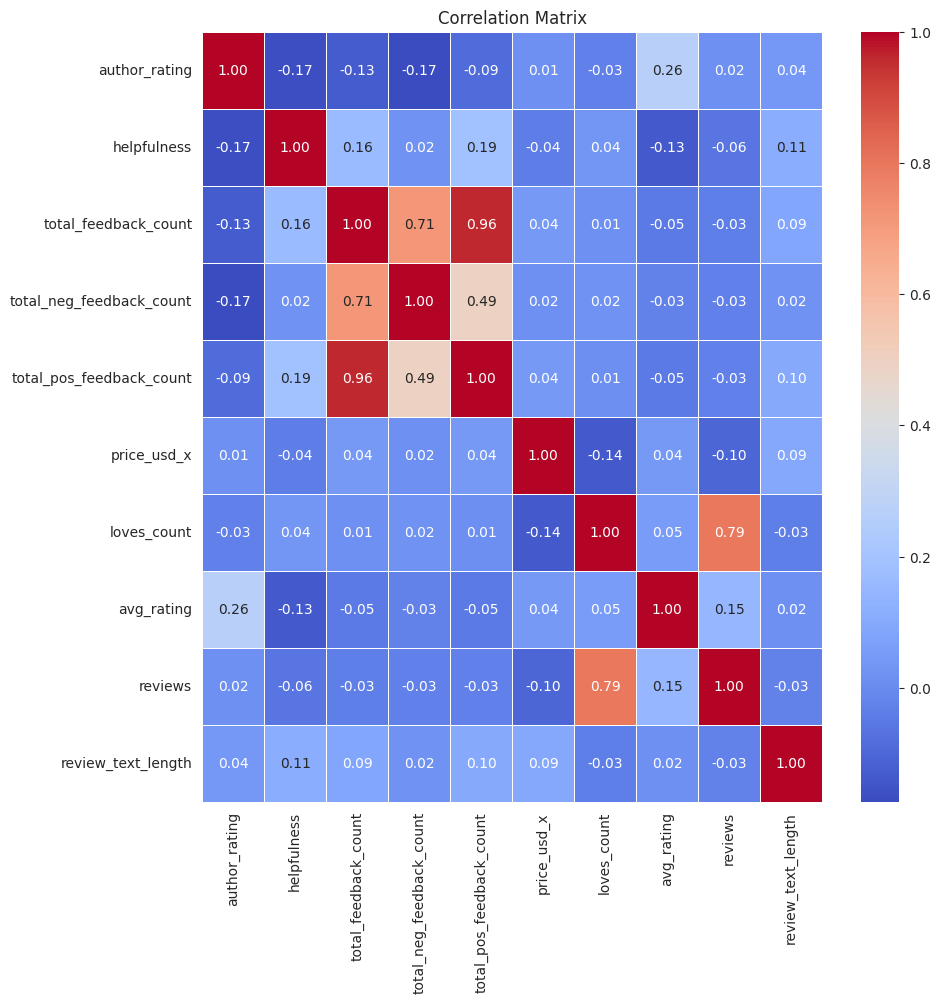

In [ ]:
# Correlation matrix
columns_correlation = products_reviews_balanced[["author_rating","helpfulness","total_feedback_count","total_neg_feedback_count","total_pos_feedback_count",
                                                 "price_usd_x","loves_count","avg_rating","reviews","review_text_length"]]

correlation_matrix = columns_correlation.corr(numeric_only = True)

# Correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = .5)
plt.title("Correlation Matrix")
plt.show()

Boxplot

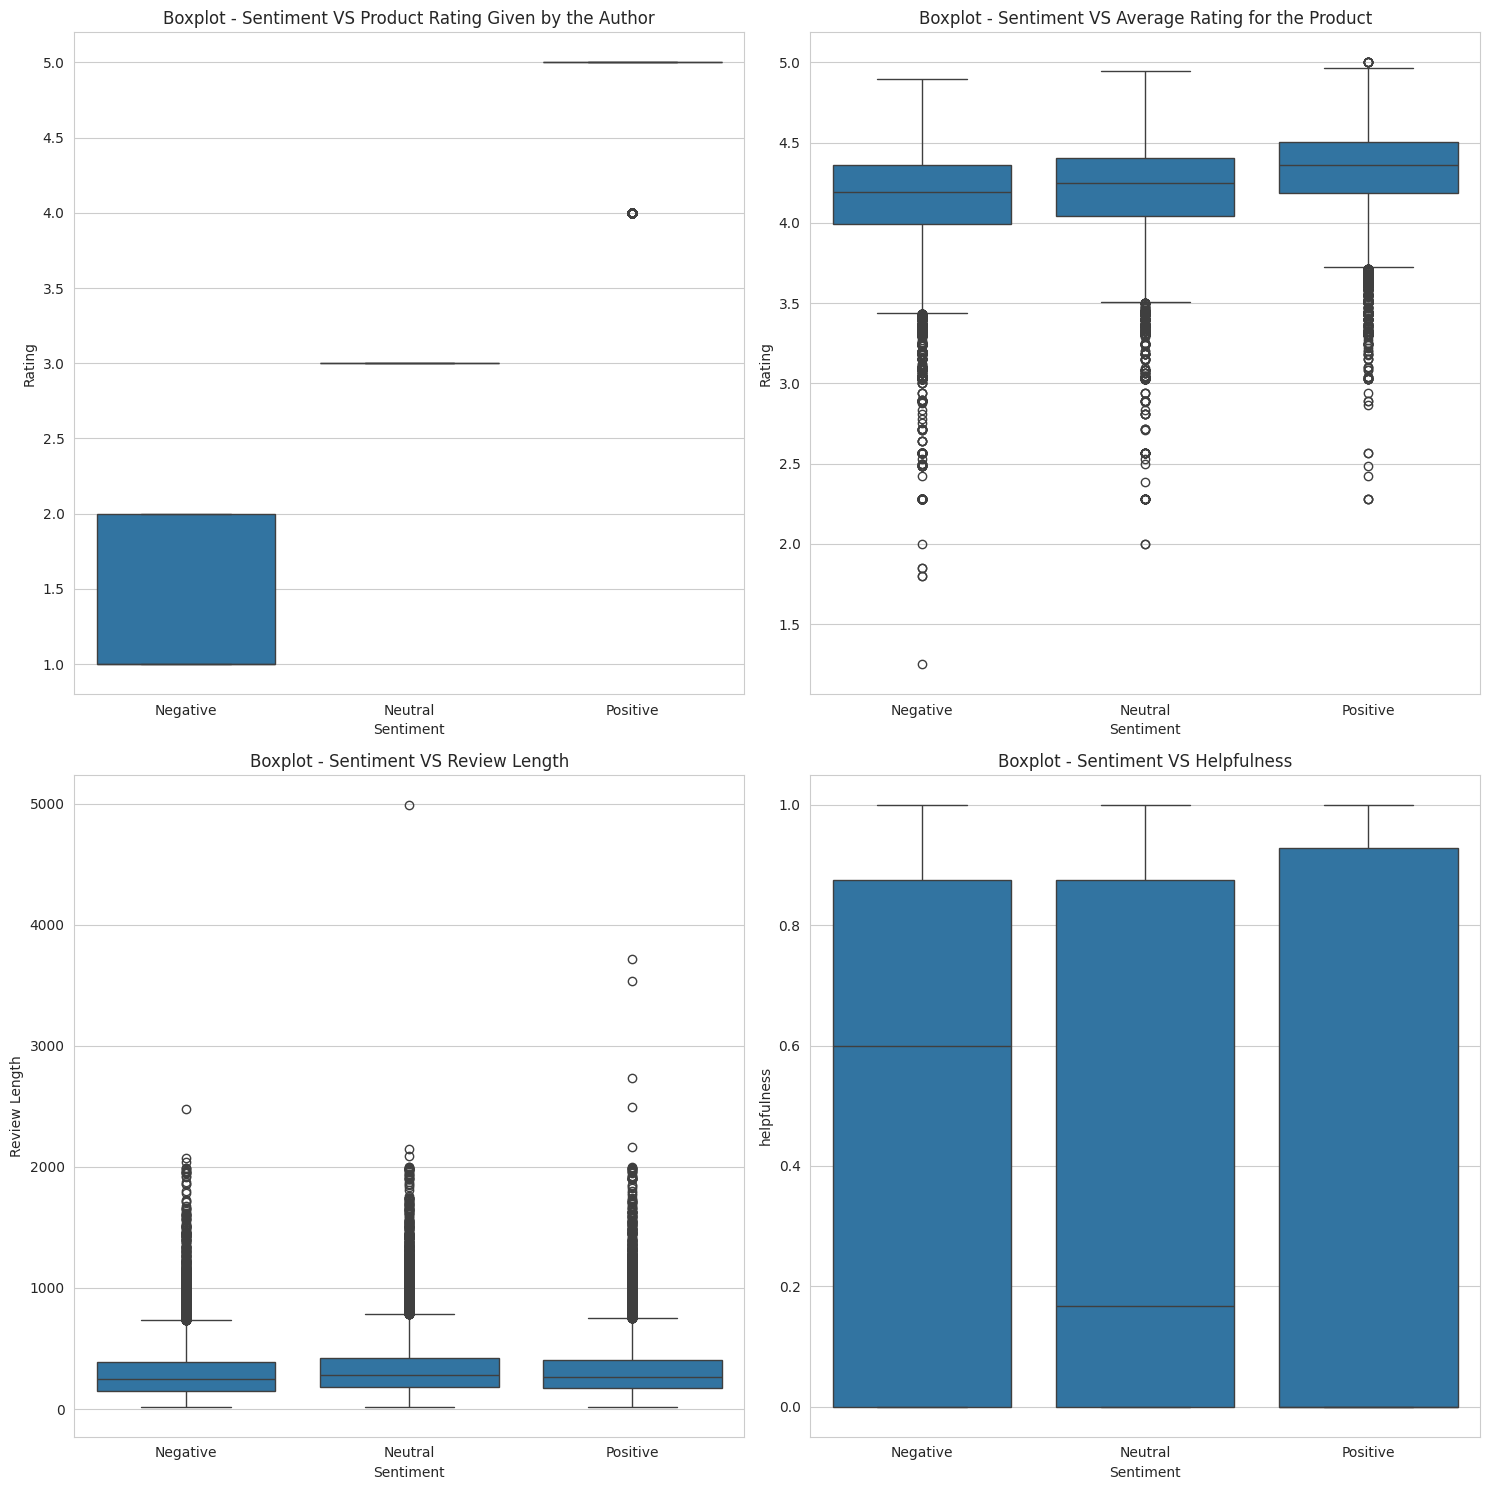

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(data=products_reviews_balanced, x="sentiment", y="author_rating", ax=axes[0,0])
axes[0,0].set_title("Boxplot - Sentiment VS Product Rating Given by the Author")
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Rating")

sns.boxplot(data=products_reviews_balanced, x="sentiment", y="avg_rating", ax=axes[0,1])
axes[0,1].set_title("Boxplot - Sentiment VS Average Rating for the Product")
axes[0,1].set_xlabel("Sentiment")
axes[0,1].set_ylabel("Rating")

sns.boxplot(data=products_reviews_balanced, x="sentiment", y="review_text_length", ax=axes[1,0])
axes[1,0].set_title("Boxplot - Sentiment VS Review Length")
axes[1,0].set_xlabel("Sentiment")
axes[1,0].set_ylabel("Review Length")

sns.boxplot(data=products_reviews_balanced, x="sentiment", y="helpfulness", ax=axes[1,1])
axes[1,1].set_title("Boxplot - Sentiment VS Helpfulness")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("helpfulness")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

Bar chart

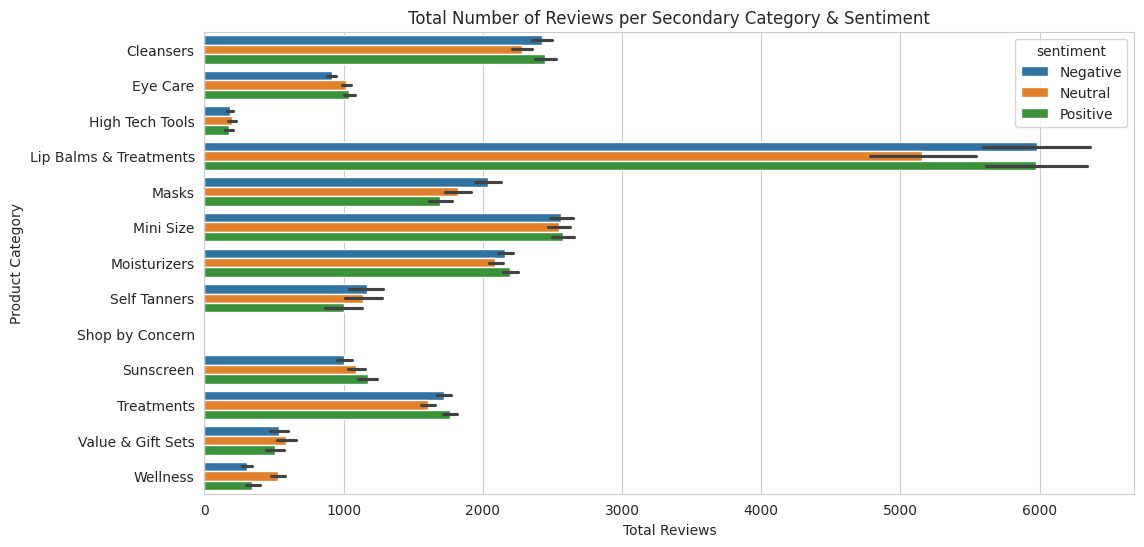

In [ ]:
# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the count plot
sns.barplot(data=products_reviews_balanced, y="secondary_category", x="reviews", hue="sentiment")
plt.title('Total Number of Reviews per Secondary Category & Sentiment')
plt.xlabel('Total Reviews')
plt.ylabel('Product Category')
plt.show()

Pre-Modelling

In [ ]:
# Uncomment to load the saved dataset
dtype_dict = {'review_text': 'str', 'cleaned_reviews': 'str', 'sentiment': 'category'}
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews_sentiments_copy.csv", engine="python", dtype=dtype_dict)

In [ ]:
# One hot encoding on the target variable
sentiment_labels = np.array(df["sentiment"])
label_list = []

for i in range(len(sentiment_labels)):
    if sentiment_labels[i] == 'Negative':
        label_list.append(0)
    if sentiment_labels[i] == 'Neutral':
        label_list.append(1)
    if sentiment_labels[i] == 'Positive':
        label_list.append(2)

sentiment_labels = tf.keras.utils.to_categorical(np.array(label_list), 3)
del label_list

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_len = 200

cleaned_reviews = df["cleaned_reviews"].values.tolist()
cleaned_reviews = [review for review in cleaned_reviews if review is not None]
cleaned_reviews = np.array(cleaned_reviews)

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(cleaned_reviews)
sequences = tokenizer.texts_to_sequences(cleaned_reviews)
review = pad_sequences(sequences, maxlen = max_len)
print(review)

[[   0    0    0 ...   39   88   80]
 [   0    0    0 ...   57   32  476]
 [   0    0    0 ... 3283   45   93]
 ...
 [   0    0    0 ...   14   32  344]
 [   0    0    0 ...   74  476    3]
 [   0    0    0 ...  148  282 2384]]


Train-test split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(review, sentiment_labels,
                                                    test_size = 0.2,
                                                    random_state = 42)

print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (48000, 200)
Shape of y_train (48000, 3)
Shape of X_test (12000, 200)
Shape of y_test (12000, 3)


Model Development

Baseline Model 1

In [35]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding, Dropout
from keras.optimizers import Adam
from keras import initializers
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Baseline Model 1
baseline_model_1 = Sequential()

# Embedding Layer
baseline_model_1.add(Embedding(max_words, 300, input_shape=(max_len,),
                    embeddings_initializer = 'he_normal',
                    embeddings_regularizer = regularizers.l2(0.01)))

# 1D Convolutional Layer
baseline_model_1.add(Conv1D(filters=280, kernel_size=3, padding='valid', activation='tanh'))

# Max Pooling Layer
baseline_model_1.add(MaxPooling1D(pool_size=2))

# LSTM Layer with dropout
baseline_model_1.add(LSTM(256, dropout=0.4))

# Dense Layer with Dropout
baseline_model_1.add(Dense(128, activation='relu'))
baseline_model_1.add(Dropout(0.4))

# Dense Output Layer (3-class classification)
baseline_model_1.add(Dense(3, activation='softmax', kernel_regularizer = regularizers.l2(0.01)))

# Model Compilation
baseline_model_1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoint for saving model
checkpoint_1 = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/model_1_copy.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch',  # Save the model after each epoch
    save_weights_only=False
)

# Early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Fitting the model with X_train and y_train
baseline_model_1_history = baseline_model_1.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test), callbacks=[checkpoint_1,early_stopping_monitor])

Epoch 1/25
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5794 - loss: 1.1588
Epoch 1: val_accuracy improved from -inf to 0.68608, saving model to /content/drive/MyDrive/Colab Notebooks/model_1_copy.keras
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 51s 16ms/step - accuracy: 0.5794 - loss: 1.1588 - val_accuracy: 0.6861 - val_loss: 0.9545
Epoch 2/25
2999/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6753 - loss: 0.9560
Epoch 2: val_accuracy improved from 0.68608 to 0.69783, saving model to /content/drive/MyDrive/Colab Notebooks/model_1_copy.keras
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 84s 17ms/step - accuracy: 0.6753 - loss: 0.9560 - val_accuracy: 0.6978 - val_loss: 0.9124
Epoch 3/25
2999/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6913 - loss: 0.9290
Epoch 3: val_accuracy improved from 0.69783 to 0.70350, saving model to /content/drive/MyDrive/Colab Notebooks/model_1_copy.keras
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.6913 - loss: 0.9290 - val_accuracy: 0.7035 - 

In [36]:
# Model summary
baseline_model_1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 200, 300)            │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 198, 280)            │         252,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 99, 280)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 256)                 │         549,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,506,355 (78.23 MB)

 Trainable params: 6,835,451 (26.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,670,904 (52.15 MB)

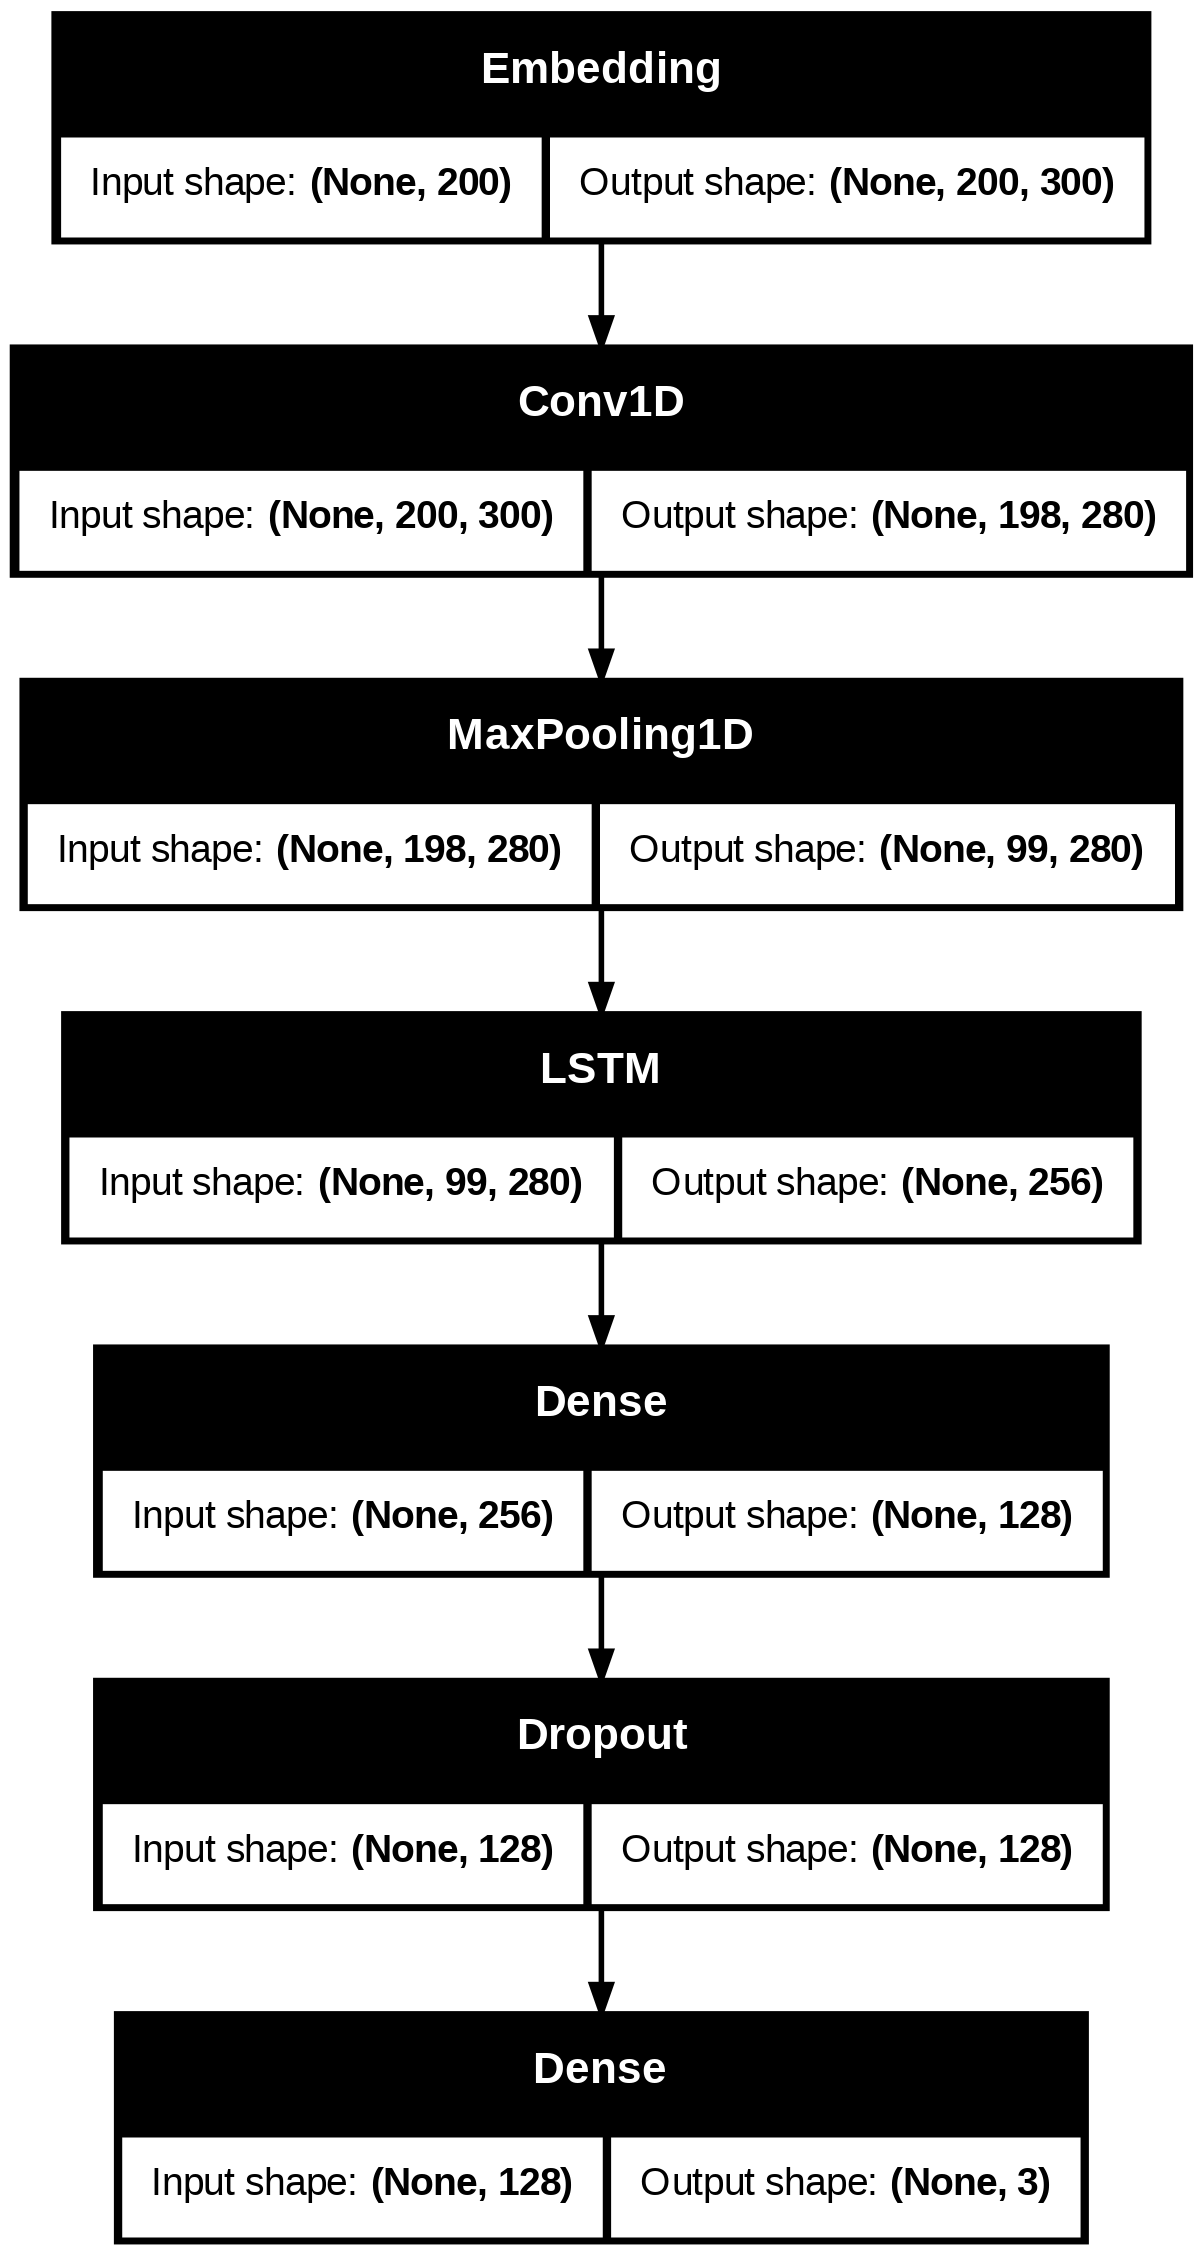

In [37]:
# Model architecture
tf.keras.utils.plot_model(baseline_model_1,show_shapes=True)

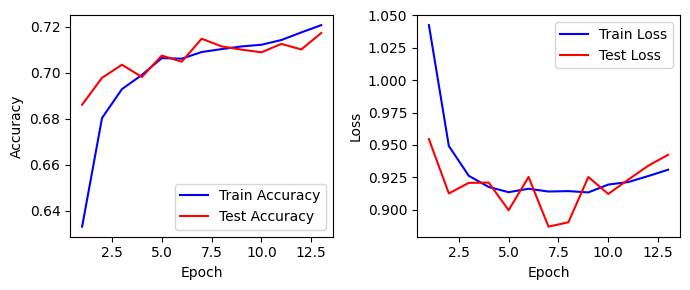

In [38]:
baseline_model_1_acc2 = baseline_model_1_history.history['accuracy']
baseline_model_1_val_acc = baseline_model_1_history.history['val_accuracy']
baseline_model_1_loss2 = baseline_model_1_history.history['loss']
baseline_model_1_val_loss = baseline_model_1_history.history['val_loss']

baseline_model_1_epochs = range(1,len(baseline_model_1_acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(baseline_model_1_epochs, baseline_model_1_acc2,'b',label='Train Accuracy')
axes[0].plot(baseline_model_1_epochs, baseline_model_1_val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(baseline_model_1_epochs, baseline_model_1_loss2,'b',label='Train Loss')
axes[1].plot(baseline_model_1_epochs, baseline_model_1_val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


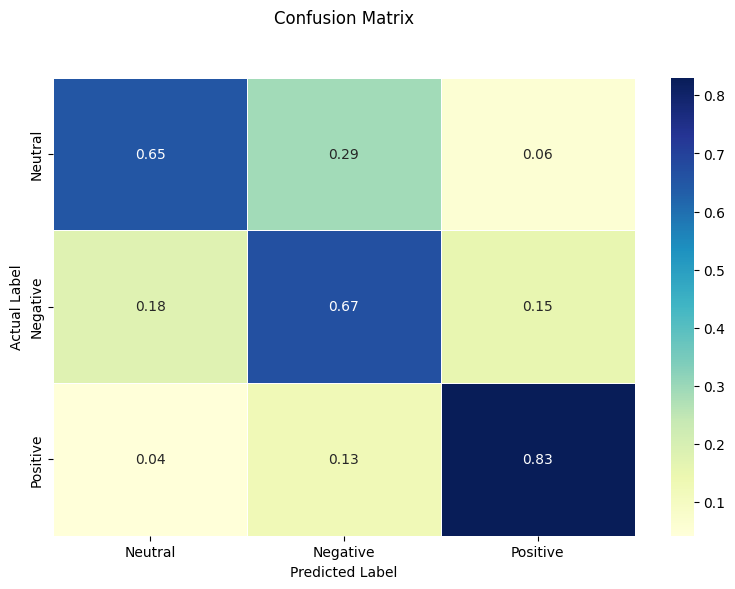

In [39]:
from sklearn import metrics

# Predicting test set result
pred_prob_test_baseline_model_1 = baseline_model_1.predict(X_test)

# Convert predictions to single-label
pred_test_baseline_model_1 = np.argmax(pred_prob_test_baseline_model_1, axis=1)
y_test_single_label = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm_test_baseline_model_1 = metrics.confusion_matrix(y_test_single_label, pred_test_baseline_model_1)

# Class names
class_names = ['Neutral', 'Negative', 'Positive']

# Create confusion matrix dataframe
conf_matrix_baseline_model_1 = pd.DataFrame(cm_test_baseline_model_1, index=class_names, columns=class_names)

conf_matrix_normalized_baseline_model_1 = conf_matrix_baseline_model_1.astype('float') / conf_matrix_baseline_model_1.sum(axis=1).to_numpy()[:, np.newaxis]

# Plot heatmap for the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_baseline_model_1, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)

# Formatting the plot
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [41]:
# Classification Report
target_names = ["Negative", "Neutral", "Positive"]

# Calculate predicted labels from probabilities
pred_test_baseline_model_1 = np.argmax(pred_prob_test_baseline_model_1, axis=1)

# Ensure y_test is also in single-label format (if it's one-hot encoded)
y_test_single_label = np.argmax(y_test, axis=1)

# Use predicted labels and single-label y_test
print(classification_report(y_test_single_label, pred_test_baseline_model_1, target_names = target_names))

              precision    recall  f1-score   support

    Negative       0.74      0.65      0.69      3981
     Neutral       0.62      0.67      0.64      4014
    Positive       0.80      0.83      0.81      4005

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000



375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


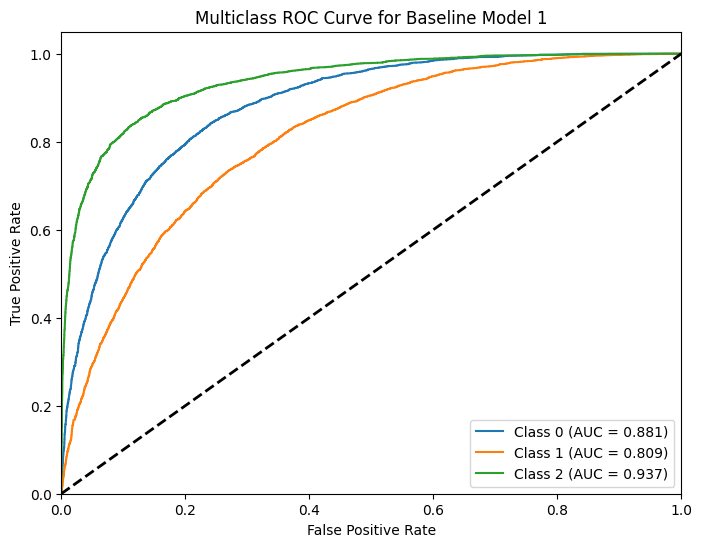

In [42]:
# ROC Curve
from sklearn.preprocessing import label_binarize

n_classes = 3

# Binarize the labels for One-vs-Rest (OvR)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities using model.predict()
pred_test_baseline_model_1 = baseline_model_1.predict(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_test_baseline_model_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Baseline Model 1')
plt.legend(loc='lower right')
plt.show()

Tuned Model 1

In [43]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [81]:
import keras_tuner as kt
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding
from keras.optimizers import Adam
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

def create_hp_tune_model_1(hp):
    model = Sequential()

    # Embedding Layer
    model.add(Embedding(input_dim=max_words,
                        output_dim=hp.Int("output_dim", min_value=100, max_value=500, step=50),  # Tune embedding dimension
                        input_length=max_len,
                        embeddings_initializer='he_normal',
                        embeddings_regularizer=regularizers.l2(hp.Choice("l2_reg_embedding", [0.5, 0.1, 0.01]))))  # Regularization

    # 1D Convolutional Layer
    model.add(Conv1D(filters=hp.Int("conv_filters", min_value=64, max_value=280, step=64),  # Tune Conv1D filters
                     kernel_size=hp.Int("kernel_size", min_value=3, max_value=6, step=1),  # Tune kernel size
                     padding=hp.Choice("padding", ["same", "valid"]),
                     activation=hp.Choice("conv_activation", ["relu", "tanh"])))  # Activation function tuning

    # Max Pooling Layer
    model.add(MaxPooling1D(pool_size=hp.Int("pool_size", min_value=2, max_value=4, step=1)))  # Tune pooling size

    # LSTM Layer with Dropout
    model.add(LSTM(units=hp.Int('lstm_units', min_value=64, max_value=256, step=64),  # Tune LSTM units
                   dropout=hp.Float('lstm_dropout', min_value=0.2, max_value=0.5, step=0.1)))  # Tune LSTM dropout

    # Dense Layer with Dropout
    model.add(Dense(units=hp.Int("dense_units", min_value=64, max_value=128, step=32), activation='relu'))  # Tune Dense units
    model.add(Dropout(rate=hp.Float('dense_dropout', min_value=0.2, max_value=0.5, step=0.1)))  # Tune Dropout rate

    # Dense Output Layer
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(hp.Choice("l2_reg_output", [0.5, 0.1, 0.01]))))  # Output layer regularization

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.0001])),  # Tune learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [82]:
tuner_model_1 = kt.Hyperband(
    create_hp_tune_model_1,
    objective = "val_accuracy",
    max_epochs = 5,
    directory = "/content/drive/MyDrive/Colab Notebooks/tune_model_1_result", # directory to store tuner results
    project_name = "tune_model_1_result"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [83]:
tuner_model_1.search(X_train, y_train, epochs = 5, batch_size = 8, validation_data = (X_test, y_test))

Trial 10 Complete [00h 10m 15s]
val_accuracy: 0.675000011920929

Best val_accuracy So Far: 0.6963333487510681
Total elapsed time: 00h 58m 12s


In [84]:
# Get the best hyperparameters
best_hps_tune_model_1 = tuner_model_1.get_best_hyperparameters(num_trials = 1)[0]
print("Best hyperparameters: ", best_hps_tune_model_1.values)

Best hyperparameters:  {'output_dim': 500, 'l2_reg_embedding': 0.01, 'conv_filters': 256, 'kernel_size': 4, 'padding': 'same', 'conv_activation': 'tanh', 'pool_size': 2, 'lstm_units': 192, 'lstm_dropout': 0.2, 'dense_units': 96, 'dense_dropout': 0.30000000000000004, 'l2_reg_output': 0.1, 'learning_rate': 0.001, 'tuner/epochs': 5, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [90]:
# Develop model with the best hyperparameters found above
# Tuned Model 1
tuned_model_1 = Sequential()

# Embedding Layer
tuned_model_1.add(Embedding(max_words, 500, input_shape=(max_len,),
                    embeddings_initializer = 'he_normal',
                    embeddings_regularizer = regularizers.l2(0.01)))

# 1D Convolutional Layer
tuned_model_1.add(Conv1D(filters=256, kernel_size=4, padding='same', activation='tanh'))

# Max Pooling Layer
tuned_model_1.add(MaxPooling1D(pool_size=2))

# LSTM Layer with dropout
tuned_model_1.add(LSTM(192, dropout=0.2))

# Dense Layer with Dropout
tuned_model_1.add(Dense(96, activation='relu'))
tuned_model_1.add(Dropout(0.3))

# Dense Output Layer (3-class classification)
tuned_model_1.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.1)))

# Model Compilation
tuned_model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoint for saving model
checkpoint_2 = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/model_2.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch',  # Save the model after each epoch
    save_weights_only=False
)

# Early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Fitting the model with X_train and y_train
tuned_model_1_history = tuned_model_1.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test), callbacks=[checkpoint_2,early_stopping_monitor])

Epoch 1/25
2999/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5857 - loss: 1.2845
Epoch 1: val_accuracy improved from -inf to 0.67908, saving model to /content/drive/MyDrive/Colab Notebooks/model_2.keras
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 65s 21ms/step - accuracy: 0.5858 - loss: 1.2844 - val_accuracy: 0.6791 - val_loss: 0.9617
Epoch 2/25
2998/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6775 - loss: 0.9640
Epoch 2: val_accuracy improved from 0.67908 to 0.69083, saving model to /content/drive/MyDrive/Colab Notebooks/model_2.keras
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 80s 20ms/step - accuracy: 0.6775 - loss: 0.9640 - val_accuracy: 0.6908 - val_loss: 0.9301
Epoch 3/25
2998/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6923 - loss: 0.9371
Epoch 3: val_accuracy improved from 0.69083 to 0.69150, saving model to /content/drive/MyDrive/Colab Notebooks/model_2.keras
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.6923 - loss: 0.9371 - val_accuracy: 0.6915 - val_loss: 0.939

In [91]:
# Model summary
tuned_model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 500)            │      10,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 200, 256)            │         512,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 100, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 192)                 │         344,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 96)                  │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,627,723 (124.46 MB)

 Trainable params: 10,875,907 (41.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,751,816 (82.98 MB)

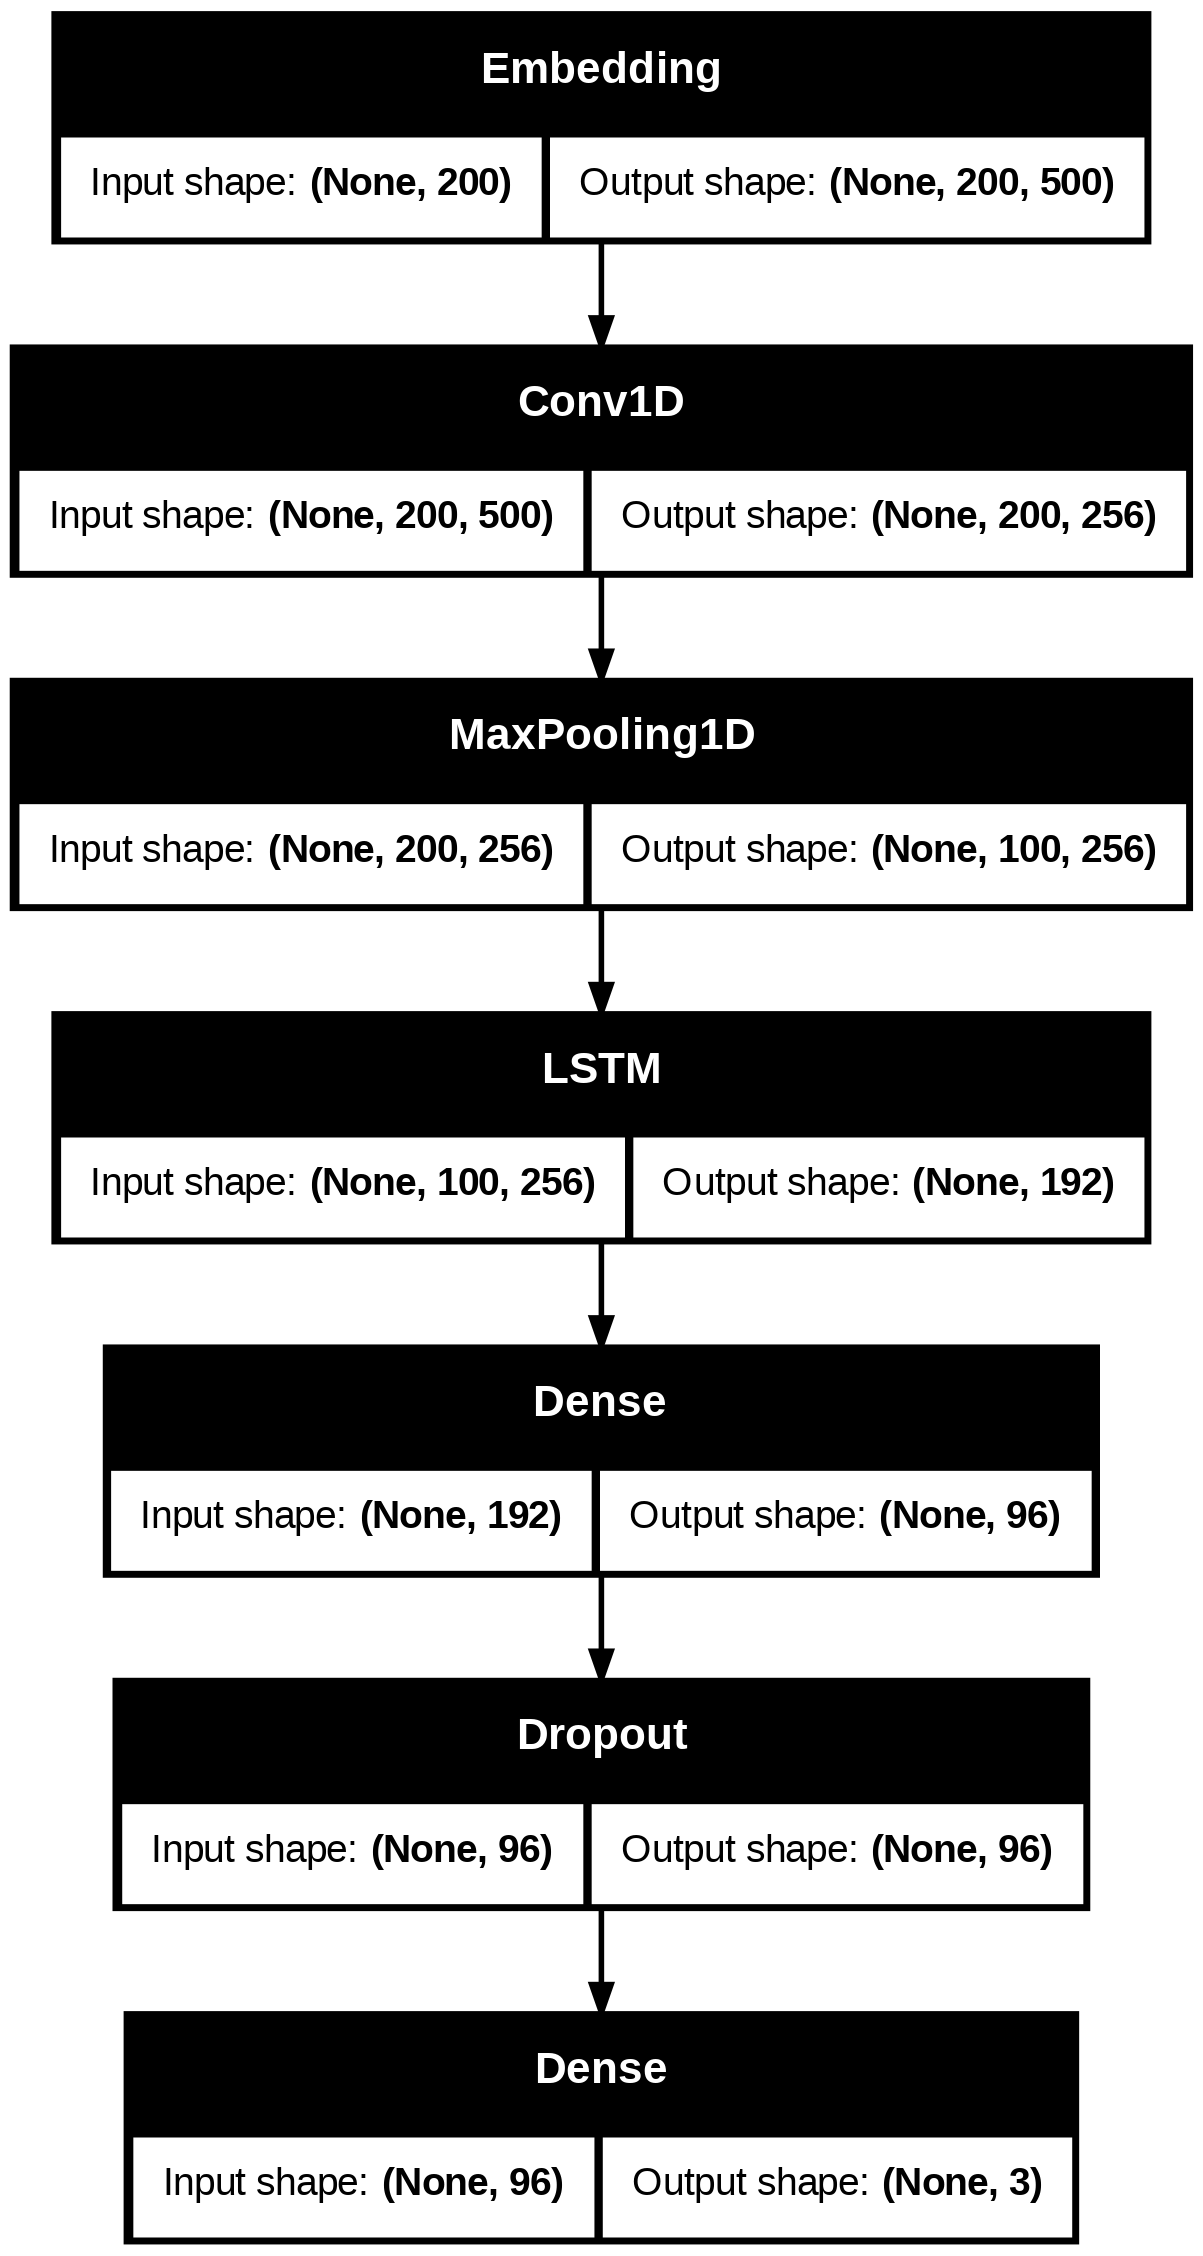

In [92]:
# Model architecture
tf.keras.utils.plot_model(tuned_model_1,show_shapes=True)

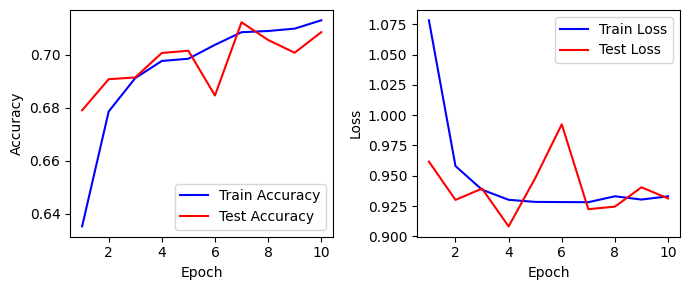

In [93]:
tuned_model_1_acc2 = tuned_model_1_history.history['accuracy']
tuned_model_1_val_acc = tuned_model_1_history.history['val_accuracy']
tuned_model_1_loss2 = tuned_model_1_history.history['loss']
tuned_model_1_val_loss = tuned_model_1_history.history['val_loss']

tuned_model_1_epochs = range(1,len(tuned_model_1_acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(tuned_model_1_epochs, tuned_model_1_acc2,'b',label='Train Accuracy')
axes[0].plot(tuned_model_1_epochs, tuned_model_1_val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(tuned_model_1_epochs, tuned_model_1_loss2,'b',label='Train Loss')
axes[1].plot(tuned_model_1_epochs, tuned_model_1_val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


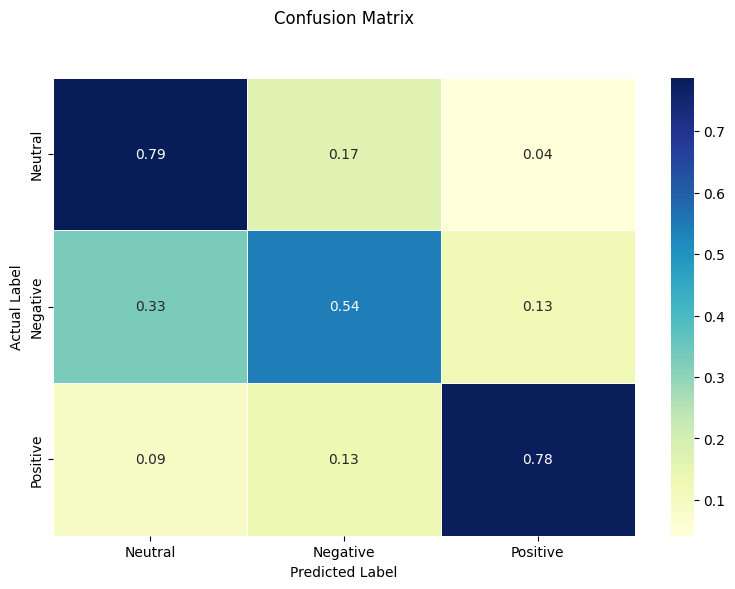

In [94]:
from sklearn import metrics

# Predicting test set result
pred_prob_test_tuned_model_1 = tuned_model_1.predict(X_test)

# Convert predictions to class labels
pred_labels = np.argmax(pred_prob_test_tuned_model_1, axis=1)

# Ensure y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)
cm_test_tuned_model_1 = metrics.confusion_matrix(y_test_labels, pred_labels)

# Class names
class_names = ['Neutral', 'Negative', 'Positive']

# Create confusion matrix dataframe
conf_matrix_tuned_model_1 = pd.DataFrame(cm_test_tuned_model_1, index=class_names, columns=class_names)

conf_matrix_normalized_tuned_model_1 = conf_matrix_tuned_model_1.astype('float') / conf_matrix_tuned_model_1.sum(axis=1).to_numpy()[:, np.newaxis]

# Plot heatmap for the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_tuned_model_1, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)

# Formatting the plot
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [95]:
# Classification Report
target_names = ["Negative", "Neutral", "Positive"]

# Ensure that y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions to class labels
pred_labels = np.argmax(pred_prob_test_tuned_model_1, axis=1)

# Use predicted labels instead of probabilities
print(classification_report(y_test_labels, pred_labels, target_names=target_names)) 

              precision    recall  f1-score   support

    Negative       0.65      0.79      0.71      3981
     Neutral       0.64      0.54      0.59      4014
    Positive       0.82      0.78      0.80      4005

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


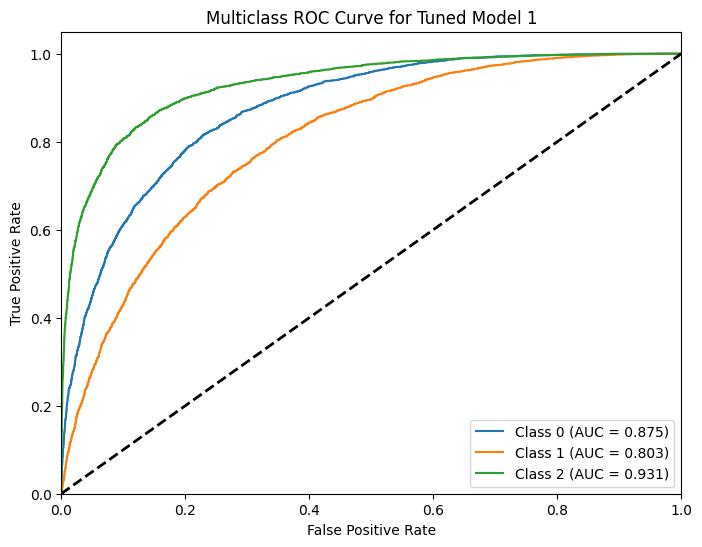

In [96]:
# ROC Curve
from sklearn.preprocessing import label_binarize

n_classes = 3

# Binarize the labels for One-vs-Rest (OvR)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities using model.predict()
pred_test_tuned_model_1 = tuned_model_1.predict(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_test_tuned_model_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Tuned Model 1')
plt.legend(loc='lower right')
plt.show()

Baseline Model 2

In [105]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding
from keras.optimizers import Adam
from keras import initializers
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

# Baseline Model 2
baseline_model_2 = Sequential()

# Embedding Layer
baseline_model_2.add(Embedding(max_words, 300, input_shape=(max_len,),
                    embeddings_initializer = 'he_normal',
                    embeddings_regularizer = regularizers.l2(0.01)))

# 1D Convolutional Layer
baseline_model_2.add(Conv1D(filters=200, kernel_size=3, padding='same', activation='tanh'))
baseline_model_2.add(Conv1D(filters=200, kernel_size=4, padding='same', activation='tanh'))

# Max Pooling Layer
baseline_model_2.add(MaxPooling1D(pool_size=3))

# LSTM Layer with dropout
baseline_model_2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.25, return_sequences=True)))
baseline_model_2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.25, return_sequences=True)))
baseline_model_2.add(Bidirectional(LSTM(150, dropout=0.5, recurrent_dropout=0.25)))

# Dense Layer with Dropout
baseline_model_2.add(Dense(256, activation='tanh'))
baseline_model_2.add(Dropout(0.4))
baseline_model_2.add(Dense(128, activation='tanh'))
baseline_model_2.add(Dropout(0.4))
baseline_model_2.add(Dense(64, activation='tanh'))
baseline_model_2.add(Dropout(0.4))

# Dense Output Layer (3-class classification)
baseline_model_2.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

# Model Compilation
baseline_model_2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoint for saving model
checkpoint_3 = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/model_3.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch',  # Save the model after each epoch
    save_weights_only=False
)

# Early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Fitting the model with X_train and y_train
baseline_model_2_history = baseline_model_2.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test),
                                                callbacks=[checkpoint_3,early_stopping_monitor])

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4844 - loss: 1.5258
Epoch 1: val_accuracy improved from -inf to 0.68500, saving model to /content/drive/MyDrive/Colab Notebooks/model_3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 211s 535ms/step - accuracy: 0.4847 - loss: 1.5247 - val_accuracy: 0.6850 - val_loss: 0.8595
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.6744 - loss: 0.8881
Epoch 2: val_accuracy improved from 0.68500 to 0.70292, saving model to /content/drive/MyDrive/Colab Notebooks/model_3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 199s 529ms/step - accuracy: 0.6744 - loss: 0.8881 - val_accuracy: 0.7029 - val_loss: 0.8465
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.6920 - loss: 0.8454
Epoch 3: val_accuracy improved from 0.70292 to 0.70575, saving model to /content/drive/MyDrive/Colab Notebooks/model_3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 194s 517ms/step - accuracy: 0.6920 - loss: 0.8453 - val_accuracy: 0.7057 - val_loss: 0.7912
E

In [106]:
# Model summary
baseline_model_2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 200, 300)            │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 200, 200)            │         180,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 200, 200)            │         160,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 66, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_21 (Bidirectional)     │ (None, 66, 600)             │       1,202,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_22 (Bidirectional)     │ (None, 66, 400)             │       1,281,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_23 (Bidirectional)     │ (None, 300)                 │         661,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │          77,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,812,011 (109.91 MB)

 Trainable params: 9,604,003 (36.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,208,008 (73.27 MB)

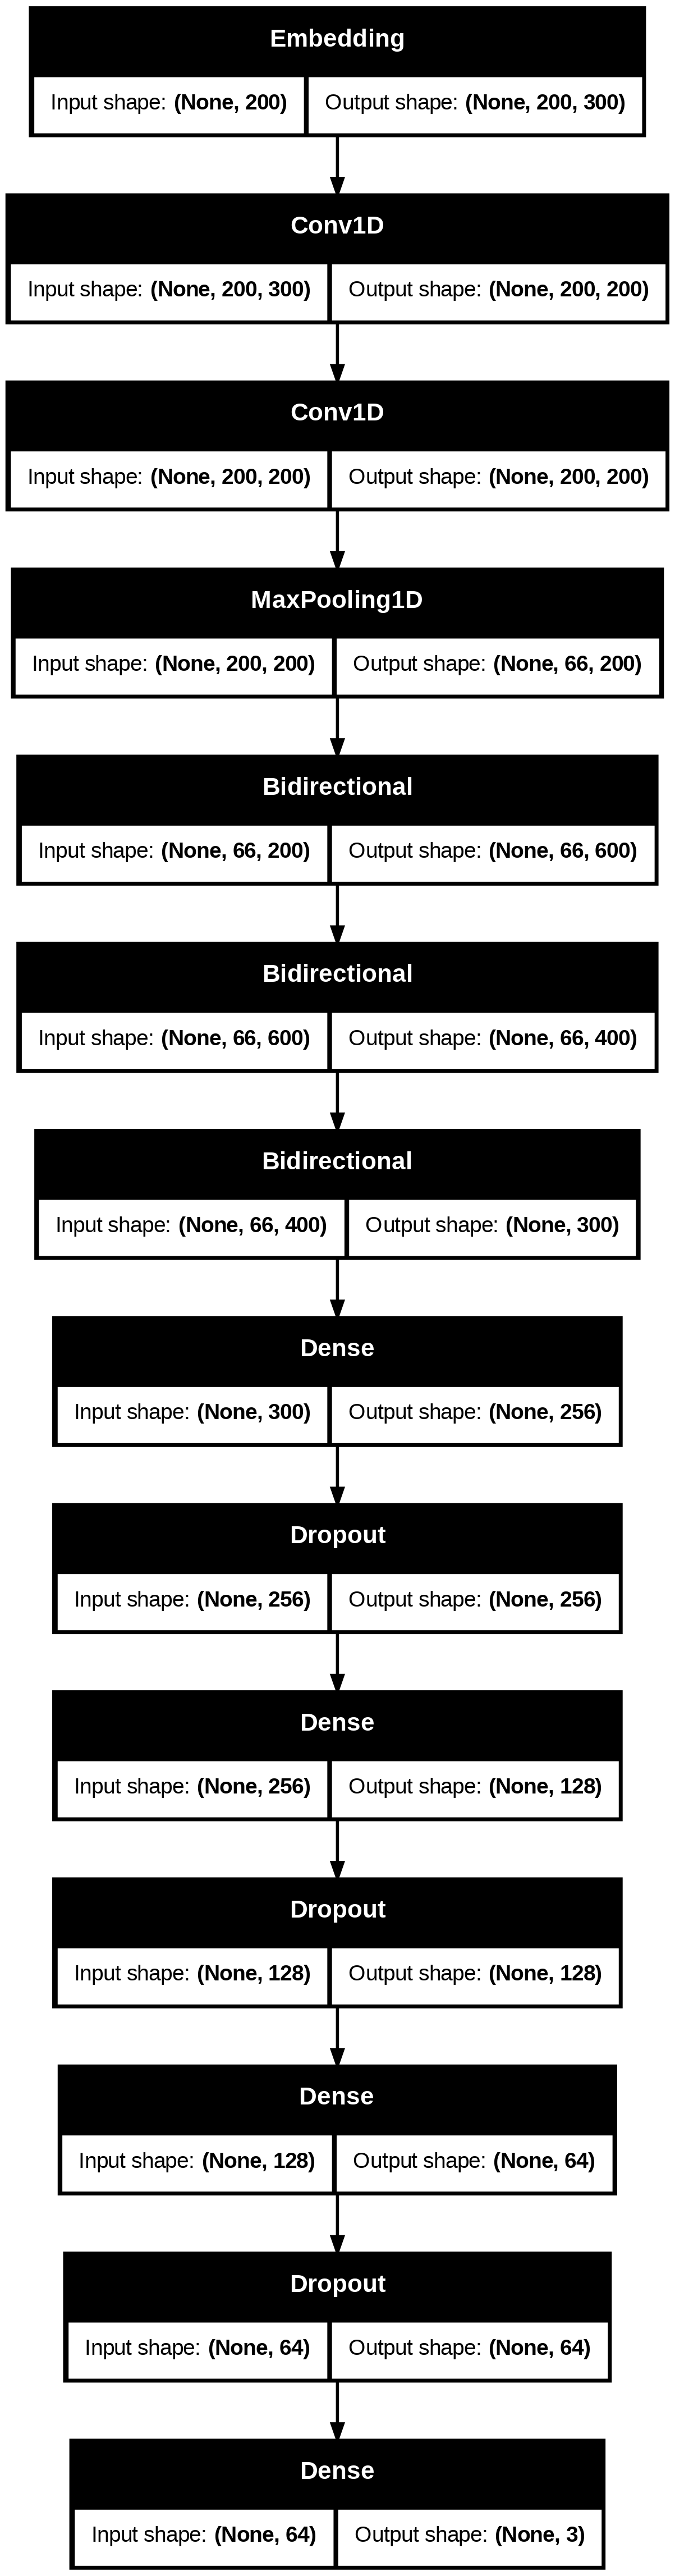

In [107]:
# Model architecture
tf.keras.utils.plot_model(baseline_model_2,show_shapes=True)

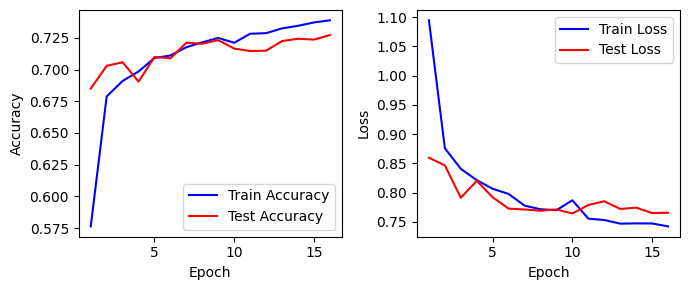

In [108]:
baseline_model_2_acc2 = baseline_model_2_history.history['accuracy']
baseline_model_2_val_acc = baseline_model_2_history.history['val_accuracy']
baseline_model_2_loss2 = baseline_model_2_history.history['loss']
baseline_model_2_loss2_val_loss = baseline_model_2_history.history['val_loss']

baseline_model_2_epochs = range(1,len(baseline_model_2_acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(baseline_model_2_epochs, baseline_model_2_acc2,'b',label='Train Accuracy')
axes[0].plot(baseline_model_2_epochs, baseline_model_2_val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(baseline_model_2_epochs, baseline_model_2_loss2,'b',label='Train Loss')
axes[1].plot(baseline_model_2_epochs, baseline_model_2_loss2_val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step


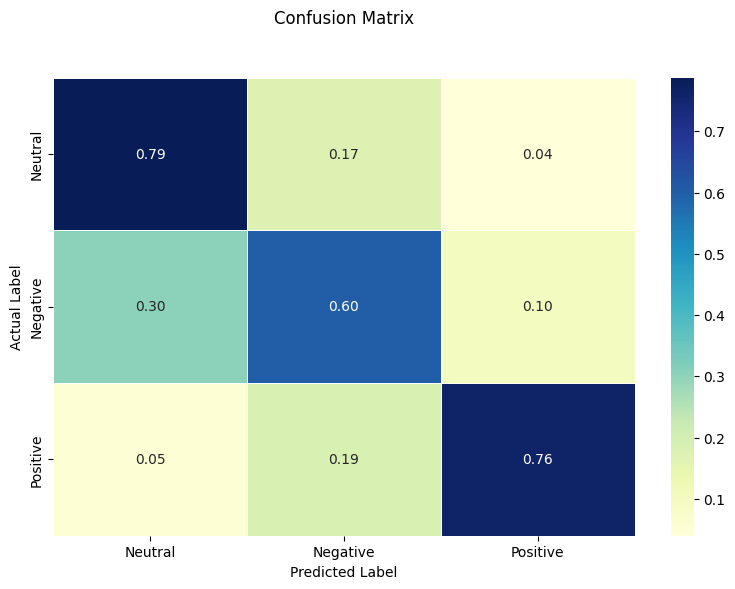

In [109]:
from sklearn import metrics

# Predicting test set result
pred_prob_test_baseline_model_2 = baseline_model_2.predict(X_test)

# Convert predictions to class labels
pred_baseline_model_2_labels = np.argmax(pred_prob_test_baseline_model_2, axis=1)

# Ensure y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)
cm_test_baseline_model_2 = metrics.confusion_matrix(y_test_labels, pred_baseline_model_2_labels)

# Class names
class_names = ['Neutral', 'Negative', 'Positive']

# Create confusion matrix dataframe
conf_matrix_baseline_model_2 = pd.DataFrame(cm_test_baseline_model_2, index=class_names, columns=class_names)

conf_matrix_normalized_baseline_model_2 = conf_matrix_baseline_model_2.astype('float') / conf_matrix_baseline_model_2.sum(axis=1).to_numpy()[:, np.newaxis]

# Plot heatmap for the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_baseline_model_2, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)

# Formatting the plot
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [110]:
# Classification Report
target_names = ["Negative", "Neutral", "Positive"]

# Ensure that y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions to class labels using argmax
pred_baseline_model_2_labels = np.argmax(pred_prob_test_baseline_model_2, axis=1) # Convert probabilities to labels

# Use predicted labels instead of probabilities
print(classification_report(y_test_labels, pred_baseline_model_2_labels, target_names=target_names)) # Use predicted labels

              precision    recall  f1-score   support

    Negative       0.69      0.79      0.73      3981
     Neutral       0.63      0.60      0.61      4014
    Positive       0.85      0.76      0.80      4005

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000



375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 146ms/step


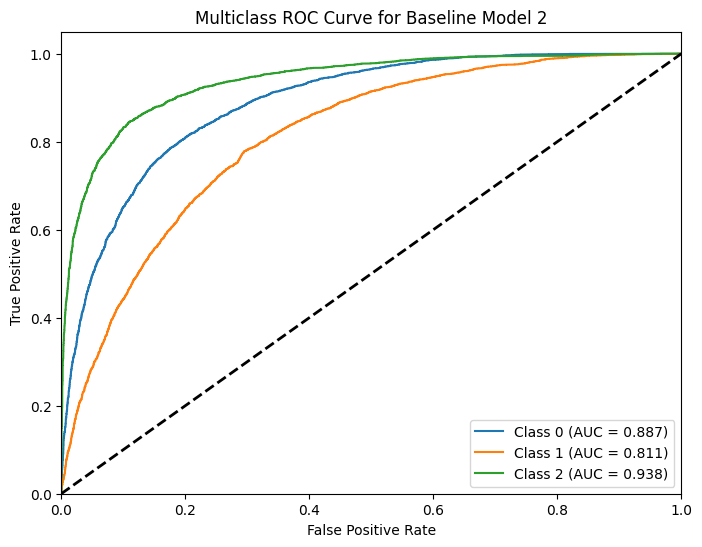

In [111]:
# ROC Curve
from sklearn.preprocessing import label_binarize

n_classes = 3

# Binarize the labels for One-vs-Rest (OvR)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities using model.predict()
pred_test_baseline_model_2 = baseline_model_2.predict(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_test_baseline_model_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Baseline Model 2')
plt.legend(loc='lower right')
plt.show()

Tuned Model 2

In [115]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding, Dropout
from keras.optimizers import Adam
from keras import regularizers
import keras_tuner as kt

def create_hp_tune_model_2(hp):

    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=max_words,
                        output_dim=hp.Int('embedding_output', min_value=100, max_value=300, step=50),  # Tunable embedding size
                        input_length=max_len,
                        embeddings_initializer='he_normal',
                        embeddings_regularizer=regularizers.l2(hp.Choice("l2_reg", [0.001, 0.01, 0.05]))))  # Tunable L2 regularization

    # 1D Convolutional Layers
    model.add(Conv1D(filters=hp.Int("conv_filters_1", min_value=100, max_value=300, step=50),  # Tunable filters
                     kernel_size=hp.Choice("kernel_size_1", [3, 4]),  # Tunable kernel size
                     padding='same', activation='tanh'))

    model.add(Conv1D(filters=hp.Int("conv_filters_2", min_value=100, max_value=300, step=50),
                     kernel_size=hp.Choice("kernel_size_2", [3, 4]),
                     padding='same', activation='tanh'))

    # MaxPooling Layer
    model.add(MaxPooling1D(pool_size=hp.Int('pool_size', min_value=2, max_value=4, step=1)))  # Tunable pool size

    # Bidirectional LSTM layers
    model.add(Bidirectional(LSTM(hp.Int('lstm_units_1', min_value=100, max_value=300, step=50),
                                 dropout=hp.Float('lstm_dropout_1', 0.2, 0.5, step=0.1),
                                 recurrent_dropout=hp.Float('lstm_recurrent_dropout_1', 0.2, 0.5, step=0.1),
                                 return_sequences=True)))

    model.add(Bidirectional(LSTM(hp.Int('lstm_units_2', min_value=100, max_value=200, step=50),
                                 dropout=hp.Float('lstm_dropout_2', 0.2, 0.5, step=0.1),
                                 recurrent_dropout=hp.Float('lstm_recurrent_dropout_2', 0.2, 0.5, step=0.1),
                                 return_sequences=True)))

    model.add(Bidirectional(LSTM(hp.Int('lstm_units_3', min_value=50, max_value=150, step=50),
                                 dropout=hp.Float('lstm_dropout_3', 0.2, 0.5, step=0.1),
                                 recurrent_dropout=hp.Float('lstm_recurrent_dropout_3', 0.2, 0.5, step=0.1))))

    # Dense layers
    model.add(Dense(hp.Int("dense_units_1", min_value=128, max_value=256, step=64), activation='tanh'))
    model.add(Dropout(hp.Float('dense_dropout_1', 0.2, 0.5, step=0.1)))

    model.add(Dense(hp.Int("dense_units_2", min_value=64, max_value=128, step=32), activation='tanh'))
    model.add(Dropout(hp.Float('dense_dropout_2', 0.2, 0.5, step=0.1)))

    model.add(Dense(hp.Int("dense_units_3", min_value=32, max_value=64, step=16), activation='tanh'))
    model.add(Dropout(hp.Float('dense_dropout_3', 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(hp.Choice("l2_output", [0.001, 0.01]))))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0001])),  # Tunable learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [123]:
tuner_model_2 = kt.Hyperband(
    create_hp_tune_model_2,
    objective = "val_accuracy",
    max_epochs = 5,
    hyperband_iterations = 1,
    directory = "/content/drive/MyDrive/Colab Notebooks/tune_model_2_result", # directory to store tuner results
    project_name = "tune_model_2_result_copy"
)

In [124]:
tuner_model_2.search(X_train, y_train, epochs = 5, batch_size = 128, validation_data = (X_test, y_test))

Trial 10 Complete [00h 26m 23s]
val_accuracy: 0.7211666703224182

Best val_accuracy So Far: 0.7284166812896729
Total elapsed time: 02h 07m 45s


In [127]:
# Get the best hyperparameters
best_hps_tune_model_2 = tuner_model_2.get_best_hyperparameters(num_trials = 1)[0]
print("Best hyperparameters: ", best_hps_tune_model_2.values)

Best hyperparameters:  {'embedding_output': 250, 'l2_reg': 0.001, 'conv_filters_1': 250, 'kernel_size_1': 3, 'conv_filters_2': 200, 'kernel_size_2': 4, 'pool_size': 3, 'lstm_units_1': 100, 'lstm_dropout_1': 0.2, 'lstm_recurrent_dropout_1': 0.2, 'lstm_units_2': 100, 'lstm_dropout_2': 0.2, 'lstm_recurrent_dropout_2': 0.4, 'lstm_units_3': 150, 'lstm_dropout_3': 0.4, 'lstm_recurrent_dropout_3': 0.30000000000000004, 'dense_units_1': 256, 'dense_dropout_1': 0.30000000000000004, 'dense_units_2': 96, 'dense_dropout_2': 0.30000000000000004, 'dense_units_3': 32, 'dense_dropout_3': 0.4, 'l2_output': 0.01, 'learning_rate': 0.001, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0004'}


In [129]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding
from keras.optimizers import Adam
from keras import initializers
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

# Tuned Model 2
tuned_model_2 = Sequential()

# Embedding Layer
tuned_model_2.add(Embedding(max_words, 250, input_shape=(max_len,),
                    embeddings_initializer = 'he_normal',
                    embeddings_regularizer = regularizers.l2(0.001)))

# 1D Convolutional Layer
tuned_model_2.add(Conv1D(filters=250, kernel_size=3, padding='same', activation='relu'))
tuned_model_2.add(Conv1D(filters=200, kernel_size=4, padding='same', activation='relu'))

# Max Pooling Layer
tuned_model_2.add(MaxPooling1D(pool_size=3))

# LSTM Layer with dropout
tuned_model_2.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
tuned_model_2.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.4, return_sequences=True)))
tuned_model_2.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.3)))

# Dense Layer with Dropout
tuned_model_2.add(Dense(256, activation='relu'))
tuned_model_2.add(Dropout(0.3))
tuned_model_2.add(Dense(96, activation='relu'))
tuned_model_2.add(Dropout(0.3))
tuned_model_2.add(Dense(32, activation='relu'))
tuned_model_2.add(Dropout(0.4))

# Dense Output Layer (3-class classification)
tuned_model_2.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

# Model Compilation
tuned_model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoint for saving model
checkpoint_4 = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/model_4.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch',  # Save the model after each epoch
    save_weights_only=False
)

# Early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Fitting the model with X_train and y_train
tuned_model_2_history = tuned_model_2.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test),
                                                callbacks=[checkpoint_4,early_stopping_monitor])

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.4625 - loss: 1.0758
Epoch 1: val_accuracy improved from -inf to 0.64983, saving model to /content/drive/MyDrive/Colab Notebooks/model_4.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 197s 501ms/step - accuracy: 0.4627 - loss: 1.0755 - val_accuracy: 0.6498 - val_loss: 0.8158
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6639 - loss: 0.8342
Epoch 2: val_accuracy improved from 0.64983 to 0.70400, saving model to /content/drive/MyDrive/Colab Notebooks/model_4.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 203s 505ms/step - accuracy: 0.6640 - loss: 0.8341 - val_accuracy: 0.7040 - val_loss: 0.7617
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7041 - loss: 0.7862
Epoch 3: val_accuracy improved from 0.70400 to 0.71358, saving model to /content/drive/MyDrive/Colab Notebooks/model_4.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 208s 522ms/step - accuracy: 0.7041 - loss: 0.7862 - val_accuracy: 0.7136 - val_loss: 0.7489
E

In [130]:
# Model summary
tuned_model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 250)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 200, 250)            │         187,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 200, 200)            │         200,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 66, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 66, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 66, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 300)                 │         421,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          77,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 96)                  │          24,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,187,045 (73.19 MB)

 Trainable params: 6,395,681 (24.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,791,364 (48.80 MB)

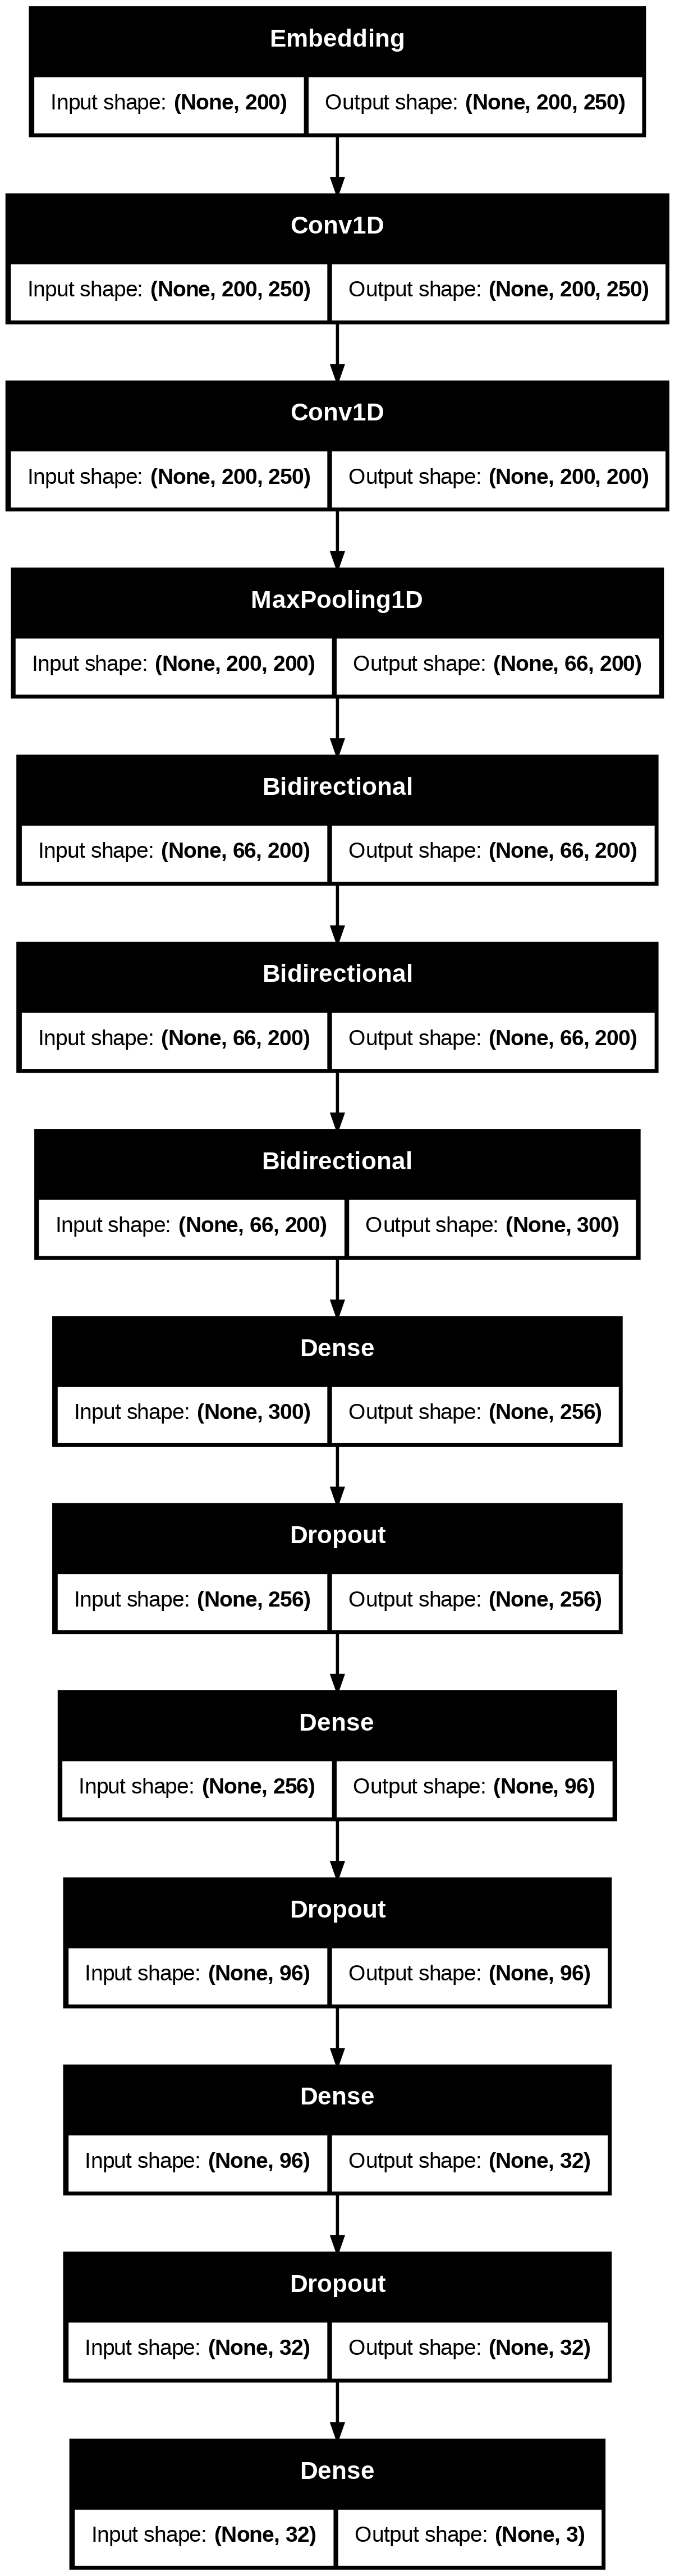

In [131]:
# Model architecture
tf.keras.utils.plot_model(tuned_model_2,show_shapes=True)

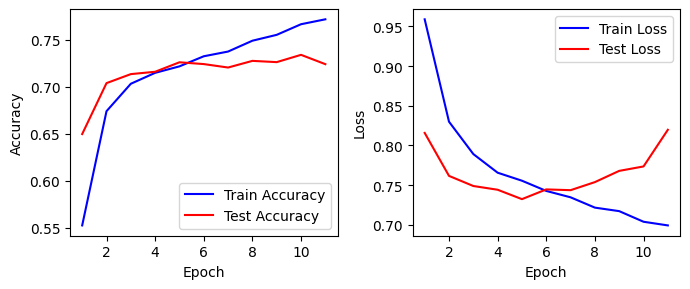

In [132]:
tuned_model_2_acc2 = tuned_model_2_history.history['accuracy']
tuned_model_2_val_acc = tuned_model_2_history.history['val_accuracy']
tuned_model_2_loss2 = tuned_model_2_history.history['loss']
tuned_model_2_loss2_val_loss = tuned_model_2_history.history['val_loss']

tuned_model_2_epochs = range(1,len(tuned_model_2_acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(tuned_model_2_epochs, tuned_model_2_acc2,'b',label='Train Accuracy')
axes[0].plot(tuned_model_2_epochs, tuned_model_2_val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(tuned_model_2_epochs, tuned_model_2_loss2,'b',label='Train Loss')
axes[1].plot(tuned_model_2_epochs, tuned_model_2_loss2_val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 147ms/step


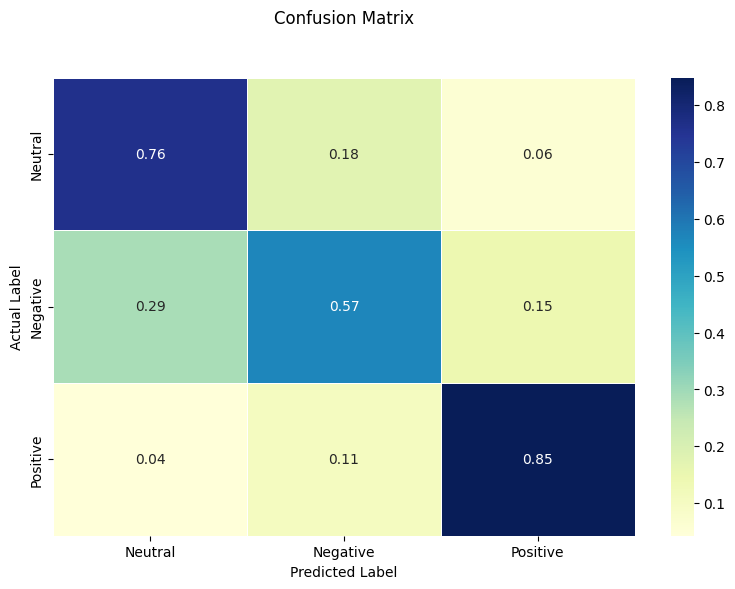

In [133]:
from sklearn import metrics

# Predicting test set result
pred_prob_test_tuned_model_2 = tuned_model_2.predict(X_test)

# Convert predictions to class labels
pred_tuned_model_2_labels = np.argmax(pred_prob_test_tuned_model_2, axis=1)

# Ensure y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)
cm_test_tuned_model_2 = metrics.confusion_matrix(y_test_labels, pred_tuned_model_2_labels)

# Class names
class_names = ['Neutral', 'Negative', 'Positive']

# Create confusion matrix dataframe
conf_matrix_tuned_model_2 = pd.DataFrame(cm_test_tuned_model_2, index=class_names, columns=class_names)

conf_matrix_normalized_tuned_model_2 = conf_matrix_tuned_model_2.astype('float') / conf_matrix_tuned_model_2.sum(axis=1).to_numpy()[:, np.newaxis]

# Plot heatmap for the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_tuned_model_2, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)

# Formatting the plot
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [134]:
# Classification Report
target_names = ["Negative", "Neutral", "Positive"]

# Ensure that y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions to class labels using argmax
pred_tuned_model_2_labels = np.argmax(pred_prob_test_tuned_model_2, axis=1) # Convert probabilities to labels

# Use predicted labels instead of probabilities
print(classification_report(y_test_labels, pred_tuned_model_2_labels, target_names=target_names)) # Use predicted labels

              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73      3981
     Neutral       0.67      0.57      0.61      4014
    Positive       0.80      0.85      0.83      4005

    accuracy                           0.73     12000
   macro avg       0.72      0.73      0.72     12000
weighted avg       0.72      0.73      0.72     12000



375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 147ms/step


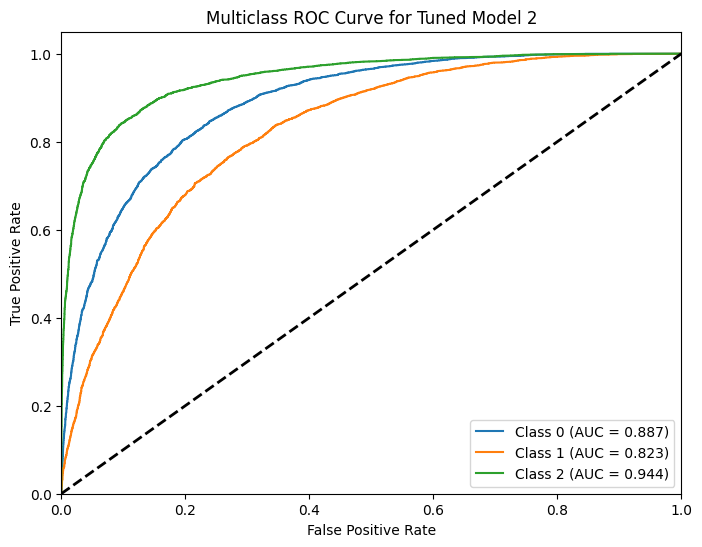

In [135]:
# ROC Curve
from sklearn.preprocessing import label_binarize

n_classes = 3

# Binarize the labels for One-vs-Rest (OvR)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities using model.predict()
pred_test_tuned_model_2 = tuned_model_2.predict(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_test_tuned_model_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Tuned Model 2')
plt.legend(loc='lower right')
plt.show()

Baseline Model 3

In [ ]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding
from keras.optimizers import Adam
from keras import initializers
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

# Baseline Model 3
baseline_model_3 = Sequential()

# Embedding Layer
baseline_model_3.add(Embedding(max_words, 300, input_shape=(max_len,),
                               embeddings_initializer = 'he_normal',
                               embeddings_regularizer = regularizers.l2(0.01)))

# 1D Convolutional Layer
baseline_model_3.add(Conv1D(filters=300, kernel_size=3, padding='valid', activation='relu'))

# Max Pooling Layer
baseline_model_3.add(MaxPooling1D(pool_size=2))

# Dropout layer
baseline_model_3.add(Dropout(0.5))

# LSTM Layer with dropout
baseline_model_3.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
baseline_model_3.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
baseline_model_3.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))

# Dense Output Layer (3-class classification)
baseline_model_3.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

# Model Compilation
baseline_model_3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoint for saving model
checkpoint_5 = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/model_5_copy.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch',  # Save the model after each epoch
    save_weights_only=False
)

# Early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Fitting the model with X_train and y_train
baseline_model_3_history = baseline_model_3.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test),
                                                callbacks=[checkpoint_5,early_stopping_monitor])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.3719 - loss: 3.4042
Epoch 1: val_accuracy improved from -inf to 0.63033, saving model to /content/drive/MyDrive/Colab Notebooks/model_5_copy.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 298s 770ms/step - accuracy: 0.3722 - loss: 3.4004 - val_accuracy: 0.6303 - val_loss: 0.8415
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.6299 - loss: 0.8382
Epoch 2: val_accuracy improved from 0.63033 to 0.65025, saving model to /content/drive/MyDrive/Colab Notebooks/model_5_copy.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 281s 751ms/step - accuracy: 0.6299 - loss: 0.8381 - val_accuracy: 0.6503 - val_loss: 0.7924
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.6572 - loss: 0.7950
Epoch 3: val_accuracy improved from 0.65025 to 0.69858, saving model to /content/drive/MyDrive/Colab Notebooks/model_5_copy.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 321s 748ms/step - accuracy: 0.6572 - loss: 0.7950 - val_accuracy: 0.6986 - val

In [ ]:
# Model summary
baseline_model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 200, 300)            │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 198, 300)            │         270,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 99, 300)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 99, 300)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ (None, 99, 600)             │       1,442,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ (None, 99, 600)             │       2,162,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ (None, 600)                 │       2,162,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           1,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,117,911 (137.78 MB)

 Trainable params: 12,039,303 (45.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,078,608 (91.85 MB)

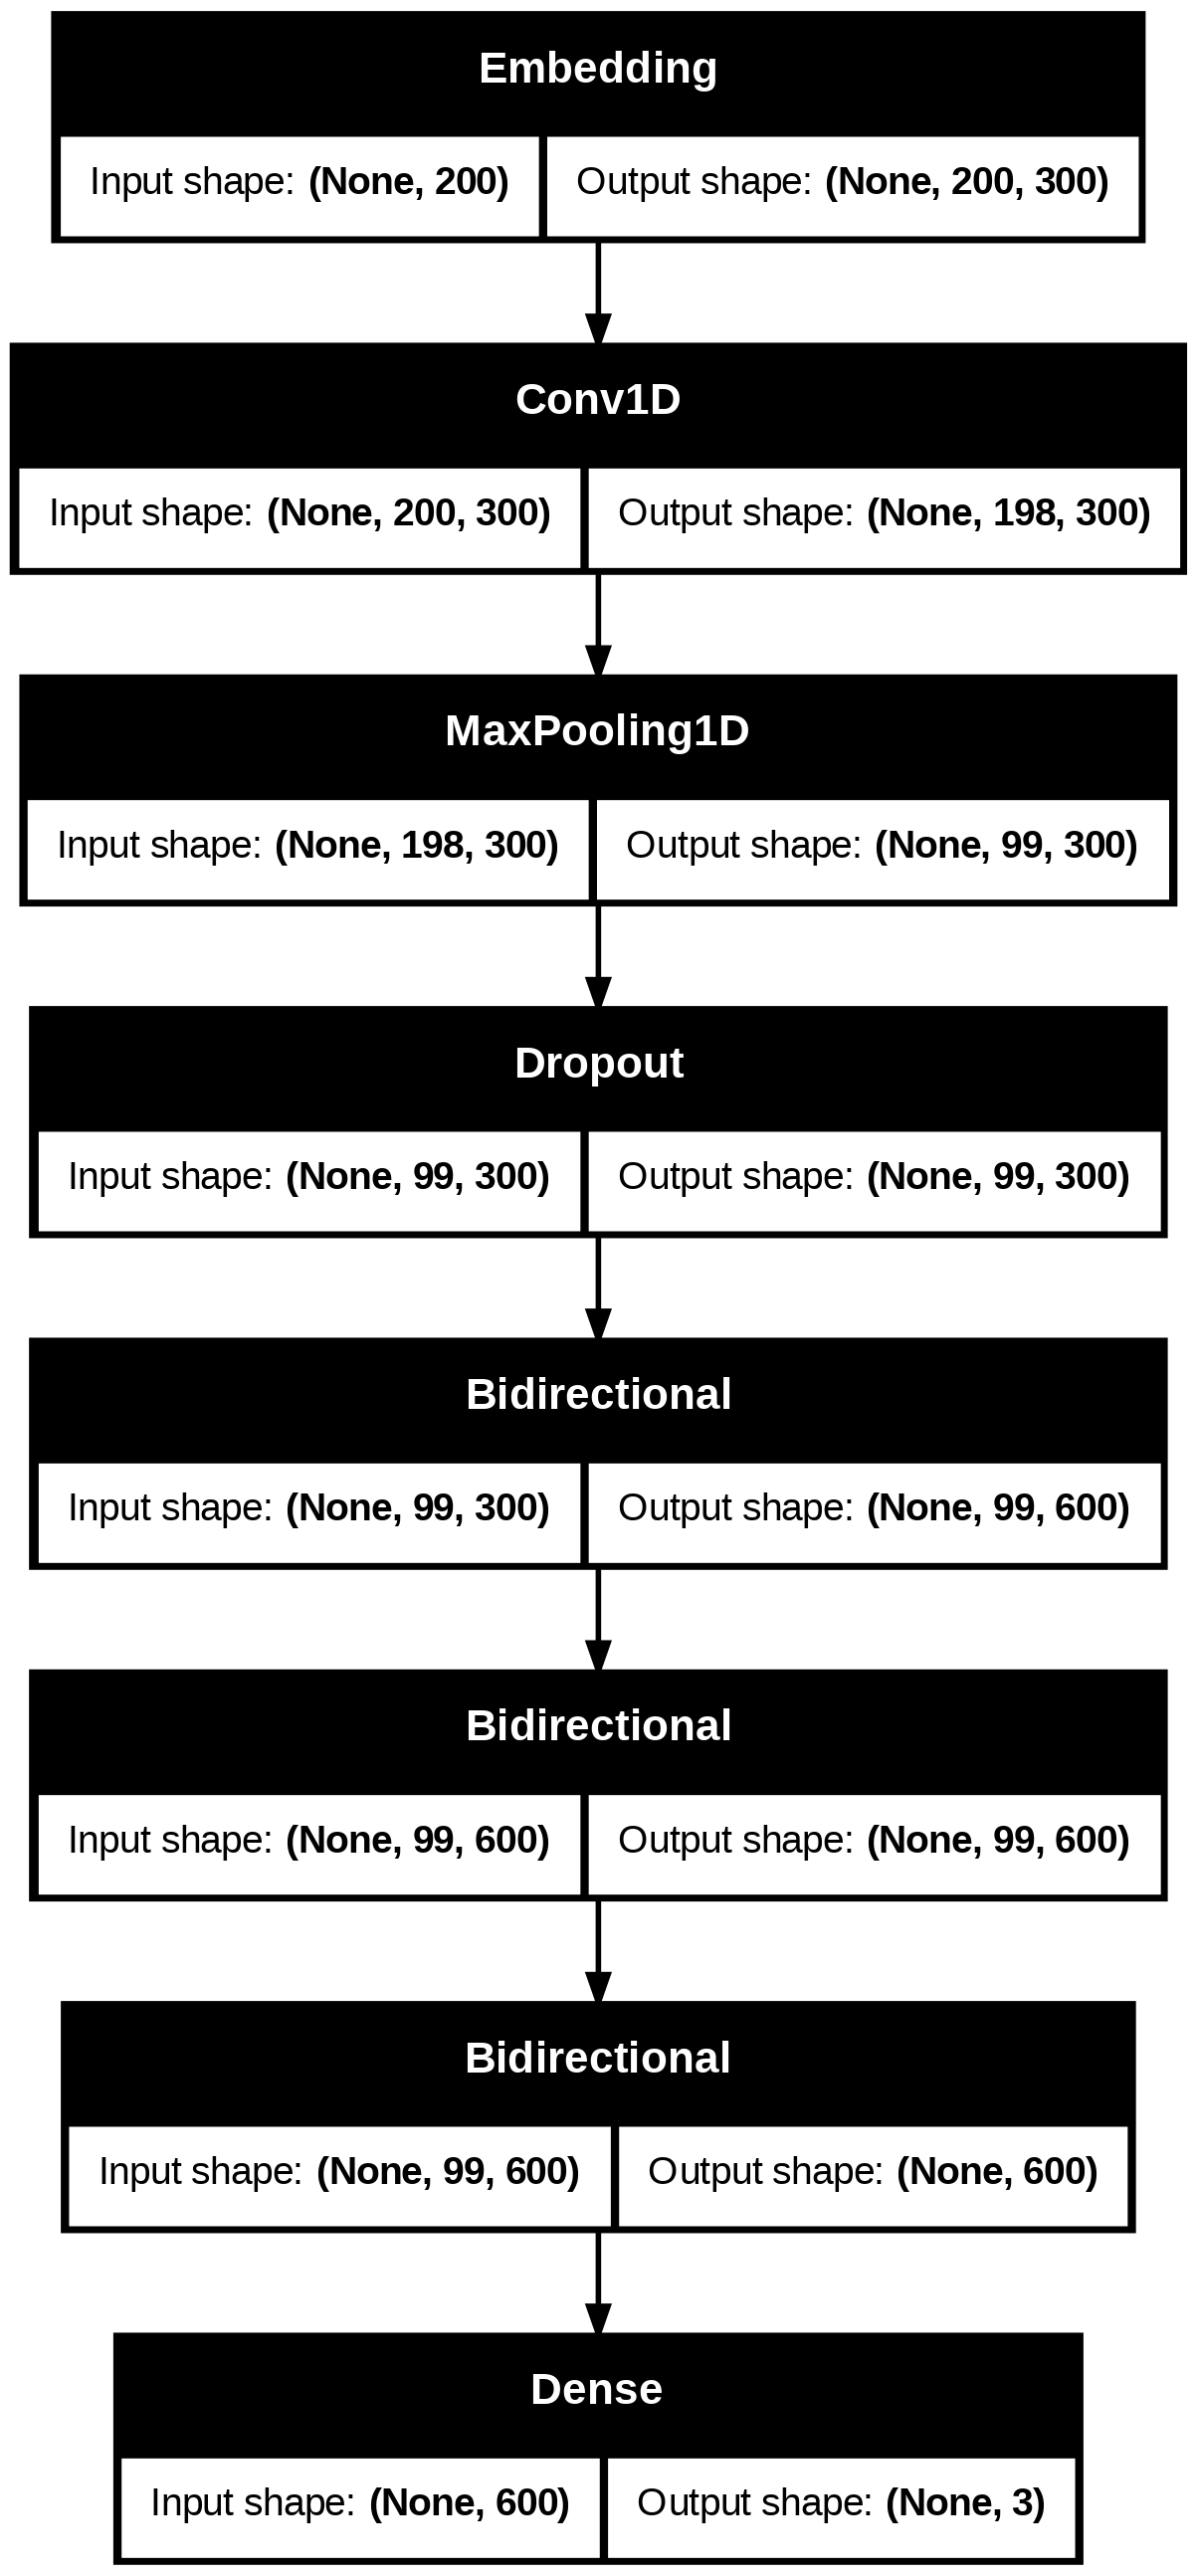

In [ ]:
# Model architecture
tf.keras.utils.plot_model(baseline_model_3,show_shapes=True)

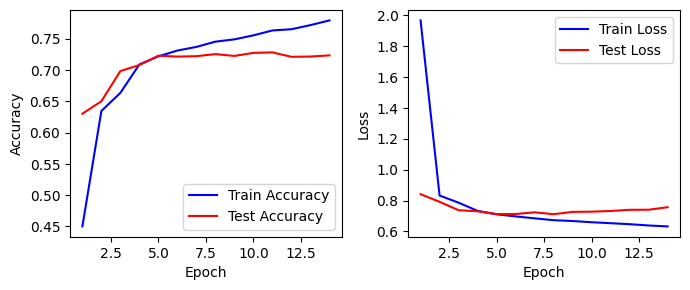

In [ ]:
baseline_model_3_acc2 = baseline_model_3_history.history['accuracy']
baseline_model_3_val_acc = baseline_model_3_history.history['val_accuracy']
baseline_model_3_loss2 = baseline_model_3_history.history['loss']
baseline_model_3_loss2_val_loss = baseline_model_3_history.history['val_loss']

baseline_model_3_epochs = range(1,len(baseline_model_3_acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(baseline_model_3_epochs, baseline_model_3_acc2,'b',label='Train Accuracy')
axes[0].plot(baseline_model_3_epochs, baseline_model_3_val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(baseline_model_3_epochs, baseline_model_3_loss2,'b',label='Train Loss')
axes[1].plot(baseline_model_3_epochs, baseline_model_3_loss2_val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 215ms/step


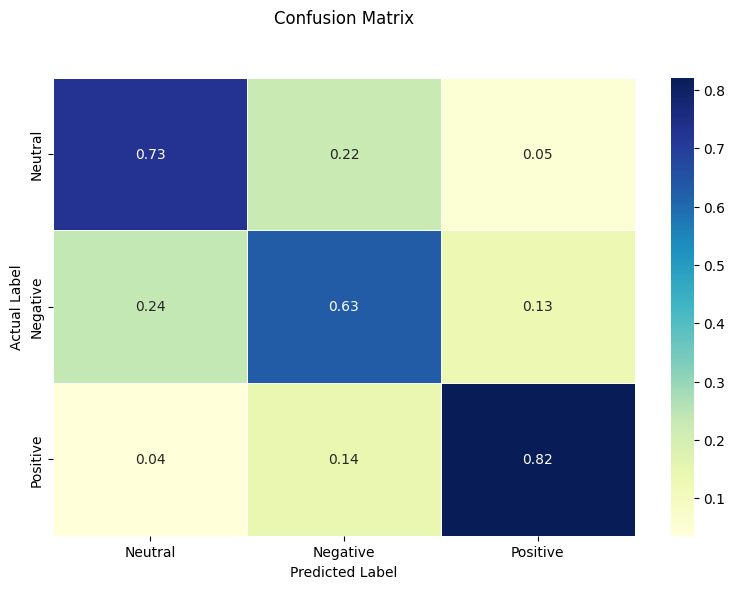

In [ ]:
from sklearn import metrics

# Predicting test set result
pred_prob_test_baseline_model_3 = baseline_model_3.predict(X_test)

# Convert predictions to class labels
pred_baseline_model_3_labels = np.argmax(pred_prob_test_baseline_model_3, axis=1)

# Ensure y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)
cm_test_baseline_model_3 = metrics.confusion_matrix(y_test_labels, pred_baseline_model_3_labels)

# Class names
class_names = ['Neutral', 'Negative', 'Positive']

# Create confusion matrix dataframe
conf_matrix_baseline_model_3 = pd.DataFrame(cm_test_baseline_model_3, index=class_names, columns=class_names)

conf_matrix_normalized_baseline_model_3 = conf_matrix_baseline_model_3.astype('float') / conf_matrix_baseline_model_3.sum(axis=1).to_numpy()[:, np.newaxis]

# Plot heatmap for the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_baseline_model_3, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)

# Formatting the plot
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
target_names = ["Negative", "Neutral", "Positive"]

# Ensure that y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions to class labels using argmax
pred_baseline_model_3_labels = np.argmax(pred_prob_test_baseline_model_3, axis=1) # Convert probabilities to labels

# Use predicted labels instead of probabilities
print(classification_report(y_test_labels, pred_baseline_model_3_labels, target_names=target_names)) # Use predicted labels

              precision    recall  f1-score   support

    Negative       0.73      0.73      0.73      3981
     Neutral       0.63      0.63      0.63      4014
    Positive       0.82      0.82      0.82      4005

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 215ms/step


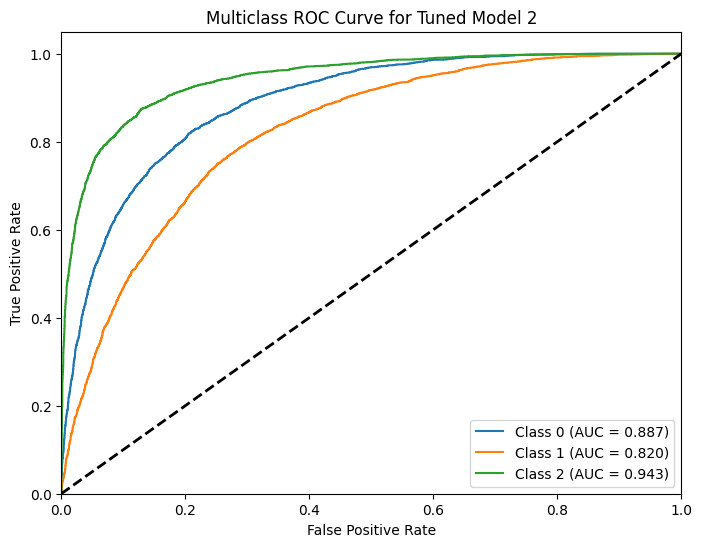

In [ ]:
# ROC Curve
from sklearn.preprocessing import label_binarize

n_classes = 3

# Binarize the labels for One-vs-Rest (OvR)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities using model.predict()
pred_test_baseline_model_3 = baseline_model_3.predict(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_test_baseline_model_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Tuned Model 2')
plt.legend(loc='lower right')
plt.show()

Tuned Model 3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding, Dropout
from keras.optimizers import Adam
from keras import regularizers
import keras_tuner as kt

def create_hp_tune_model_3(hp):
    model = Sequential()

    # Embedding Layer
    model.add(Embedding(input_dim=max_words,
                        output_dim=hp.Int("embedding_dim", min_value=100, max_value=300, step=50),  # Tune embedding dimension
                        input_length=max_len,
                        embeddings_initializer='he_normal',
                        embeddings_regularizer=regularizers.l2(hp.Choice("embedding_l2", [0.001, 0.01, 0.05]))))  # Tune L2 regularization

    # Conv1D Layer
    model.add(Conv1D(filters=hp.Int("conv_filters", min_value=100, max_value=300, step=50),  # Tune filter size
                     kernel_size=hp.Int("kernel_size", min_value=2, max_value=5, step=1),  # Tune kernel size
                     padding='valid', activation=hp.Choice("conv_activation", ["relu", "tanh"])))

    # Max Pooling Layer
    model.add(MaxPooling1D(pool_size=hp.Int("pool_size", min_value=2, max_value=3)))  # Tune pooling size

    # Dropout Layer
    model.add(Dropout(rate=hp.Float("dropout_rate_1", min_value=0.3, max_value=0.5, step=0.1)))  # Tune dropout rate

    # First LSTM Layer
    model.add(Bidirectional(LSTM(units=hp.Int("lstm_units_1", min_value=100, max_value=300, step=50),
                                 dropout=hp.Float("lstm_dropout_1", min_value=0.3, max_value=0.5, step=0.1),
                                 recurrent_dropout=hp.Float("lstm_recurrent_dropout_1", min_value=0.3, max_value=0.5, step=0.1),
                                 return_sequences=True)))

    # Second LSTM Layer
    model.add(Bidirectional(LSTM(units=hp.Int("lstm_units_2", min_value=100, max_value=300, step=50),
                                 dropout=hp.Float("lstm_dropout_2", min_value=0.3, max_value=0.5, step=0.1),
                                 recurrent_dropout=hp.Float("lstm_recurrent_dropout_2", min_value=0.3, max_value=0.5, step=0.1),
                                 return_sequences=True)))

    # Third LSTM Layer
    model.add(Bidirectional(LSTM(units=hp.Int("lstm_units_3", min_value=100, max_value=300, step=50),
                                 dropout=hp.Float("lstm_dropout_3", min_value=0.3, max_value=0.5, step=0.1),
                                 recurrent_dropout=hp.Float("lstm_recurrent_dropout_3", min_value=0.3, max_value=0.5, step=0.1))))

    # Dense Output Layer (3-class classification)
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(hp.Choice("dense_l2", [0.001, 0.01, 0.05]))))

    # Model Compilation
    model.compile(optimizer=Adam(learning_rate=hp.Choice("learning_rate", values=[0.001, 0.0001, 0.00001])),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    return model


In [ ]:
tuner_model_3 = kt.Hyperband(
    create_hp_tune_model_3,
    objective = "val_accuracy",
    max_epochs = 5,
    hyperband_iterations = 1,
    directory = "/content/drive/MyDrive/Colab Notebooks/tune_model_3_result_copy", # directory to store tuner results
    project_name = "tune_model_2_result"
)

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/tune_model_3_result_copy/tune_model_2_result/tuner0.json


In [ ]:
tuner_model_3.search(X_train, y_train, epochs = 5, batch_size = 128, validation_data = (X_test, y_test))

Trial 10 Complete [00h 16m 03s]
val_accuracy: 0.5809999704360962

Best val_accuracy So Far: 0.7086666822433472
Total elapsed time: 07h 57m 13s


In [ ]:
# Get the best hyperparameters
best_hps_tune_model_3 = tuner_model_3.get_best_hyperparameters(num_trials = 1)[0]
print("Best hyperparameters: ", best_hps_tune_model_3.values)

Best hyperparameters:  {'embedding_dim': 300, 'embedding_l2': 0.001, 'conv_filters': 150, 'kernel_size': 4, 'conv_activation': 'tanh', 'pool_size': 3, 'dropout_rate_1': 0.3, 'lstm_units_1': 200, 'lstm_dropout_1': 0.3, 'lstm_recurrent_dropout_1': 0.4, 'lstm_units_2': 200, 'lstm_dropout_2': 0.3, 'lstm_recurrent_dropout_2': 0.5, 'lstm_units_3': 300, 'lstm_dropout_3': 0.5, 'lstm_recurrent_dropout_3': 0.3, 'dense_l2': 0.001, 'learning_rate': 0.001, 'tuner/epochs': 5, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [ ]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding
from keras.optimizers import Adam
from keras import initializers
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

# Tuned Model 3
tuned_model_3 = Sequential()

# Embedding Layer
tuned_model_3.add(Embedding(max_words, 300, input_shape=(max_len,),
                               embeddings_initializer = 'he_normal',
                               embeddings_regularizer = regularizers.l2(0.001)))

# 1D Convolutional Layer
tuned_model_3.add(Conv1D(filters=150, kernel_size=4, padding='valid', activation='tanh'))

# Max Pooling Layer
tuned_model_3.add(MaxPooling1D(pool_size=3))

# Dropout layer
tuned_model_3.add(Dropout(0.3))

# LSTM Layer with dropout
tuned_model_3.add(Bidirectional(LSTM(200, dropout=0.3, recurrent_dropout=0.4, return_sequences=True)))
tuned_model_3.add(Bidirectional(LSTM(200, dropout=0.3, recurrent_dropout=0.5, return_sequences=True)))
tuned_model_3.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.3)))

# Dense Output Layer (3-class classification)
tuned_model_3.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

# Model Compilation
tuned_model_3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoint for saving model
checkpoint_6 = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/model_6_copy.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch',  # Save the model after each epoch
    save_weights_only=False
)

# Early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Fitting the model with X_train and y_train
tuned_model_3_history = tuned_model_3.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test),
                                                callbacks=[checkpoint_6,early_stopping_monitor])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5221 - loss: 1.0130
Epoch 1: val_accuracy improved from -inf to 0.68425, saving model to /content/drive/MyDrive/Colab Notebooks/model_6_copy.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 197s 496ms/step - accuracy: 0.5223 - loss: 1.0127 - val_accuracy: 0.6842 - val_loss: 0.8028
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.6904 - loss: 0.8062
Epoch 2: val_accuracy improved from 0.68425 to 0.69975, saving model to /content/drive/MyDrive/Colab Notebooks/model_6_copy.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 187s 457ms/step - accuracy: 0.6904 - loss: 0.8062 - val_accuracy: 0.6998 - val_loss: 0.7765
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.7063 - loss: 0.7768
Epoch 3: val_accuracy improved from 0.69975 to 0.70183, saving model to /content/drive/MyDrive/Colab Notebooks/model_6_copy.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 455ms/step - accuracy: 0.7063 - loss: 0.7768 - val_accuracy: 0.7018 - val

In [ ]:
# Model summary
tuned_model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 300)            │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 197, 150)            │         180,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 65, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 65, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 65, 400)             │         561,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 65, 400)             │         961,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 600)                 │       1,682,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,162,661 (107.43 MB)

 Trainable params: 9,387,553 (35.81 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,775,108 (71.62 MB)

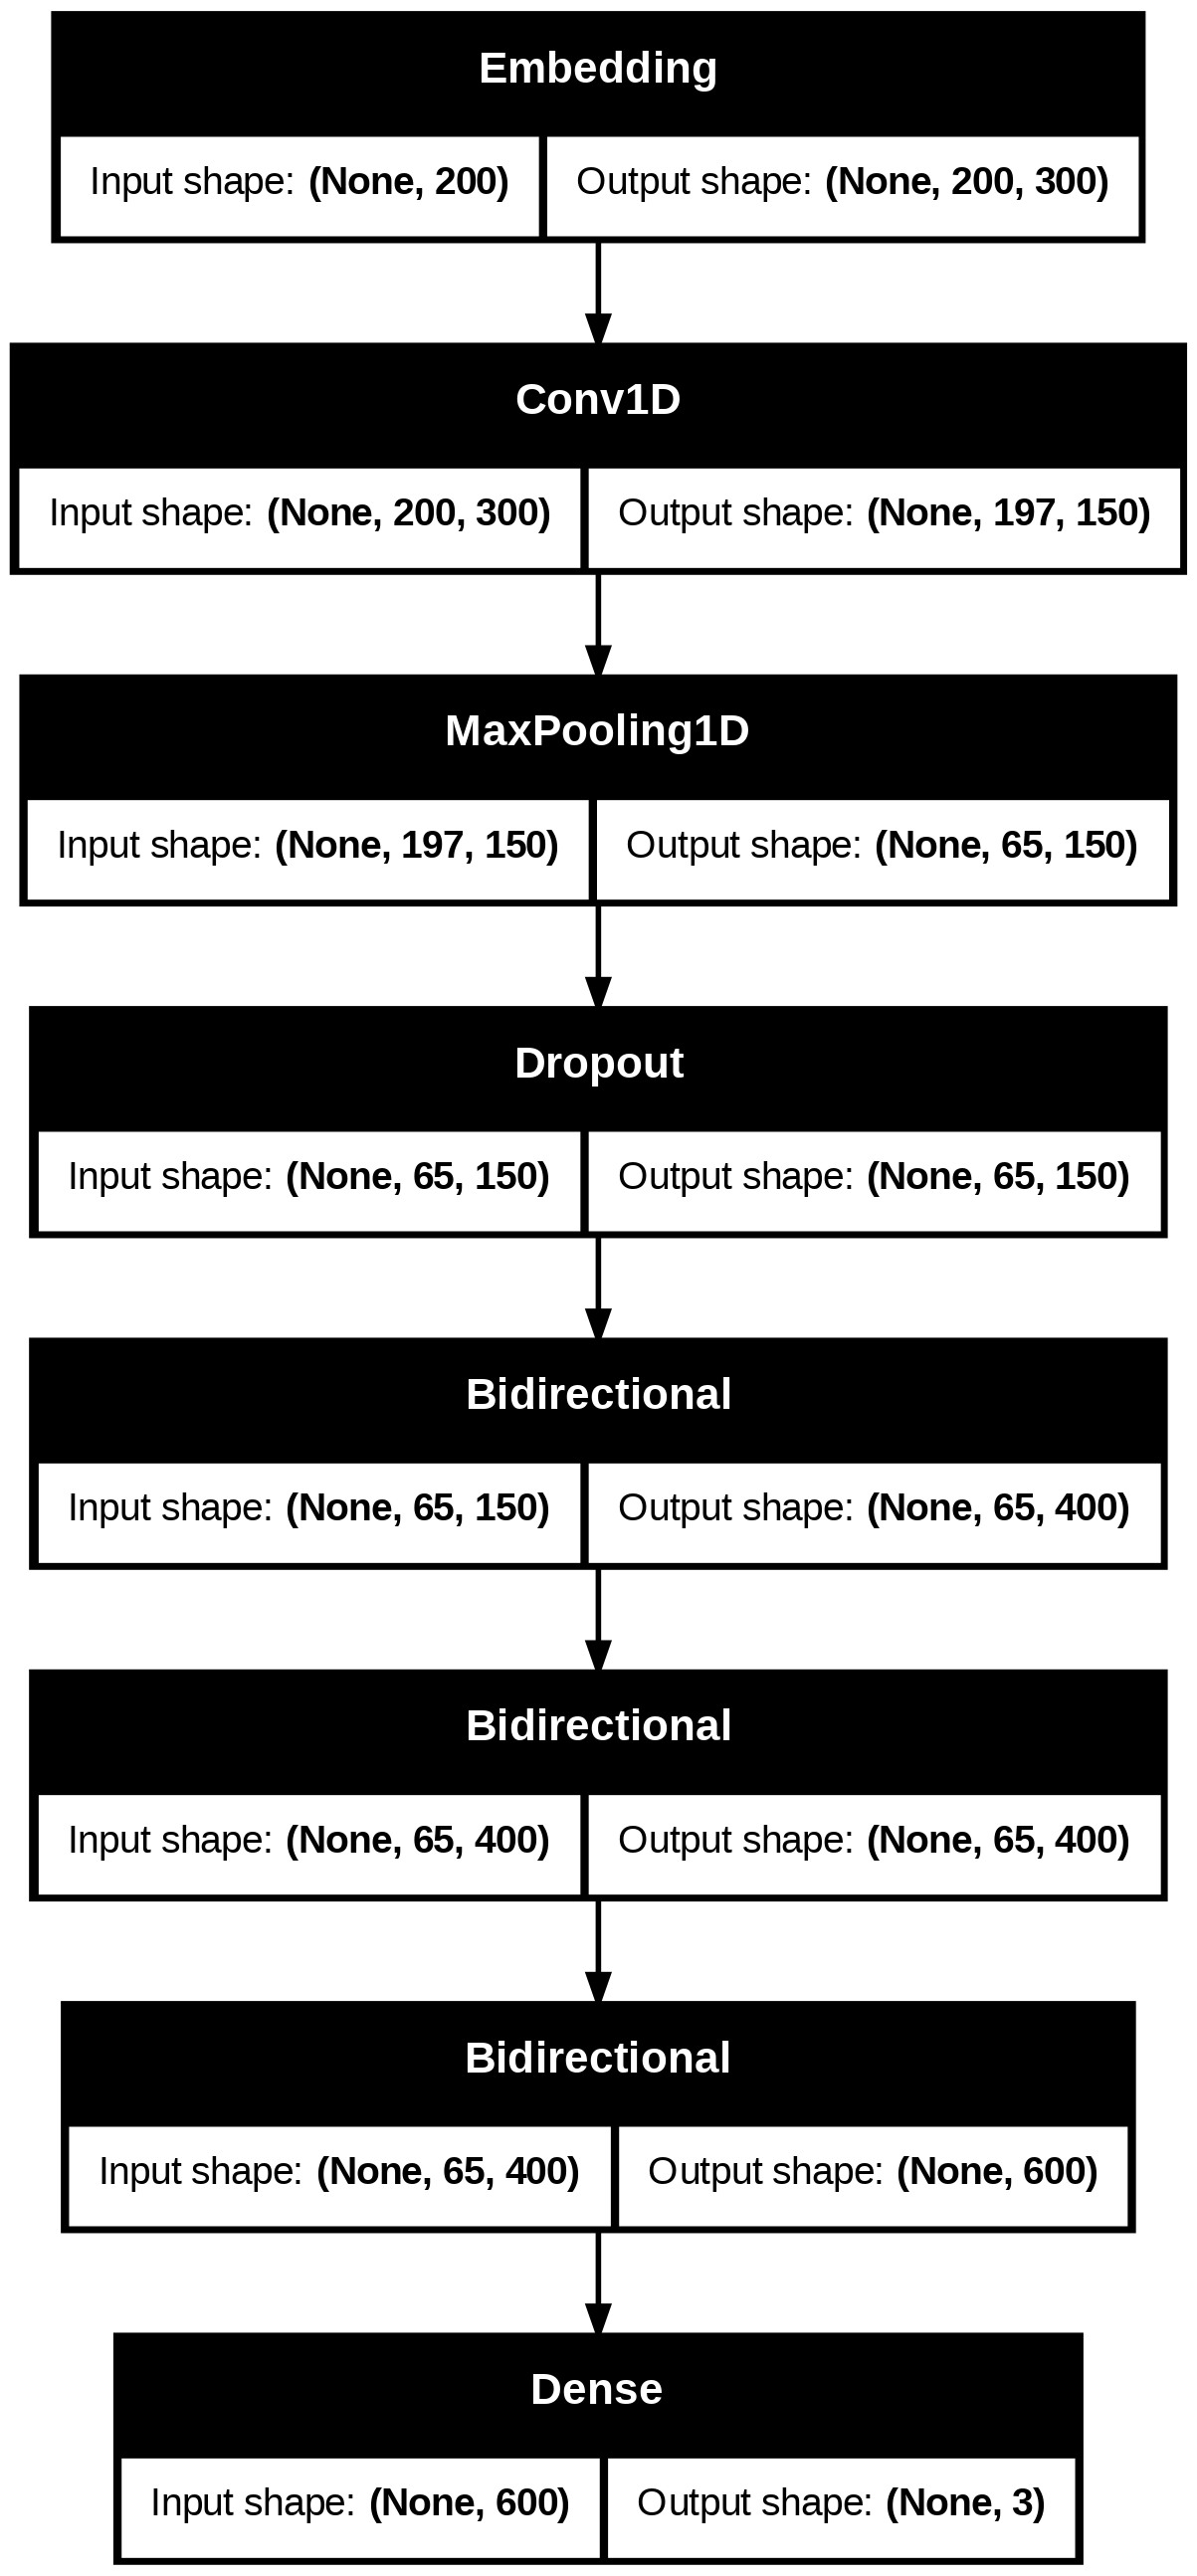

In [ ]:
# Model architecture
tf.keras.utils.plot_model(tuned_model_3,show_shapes=True)

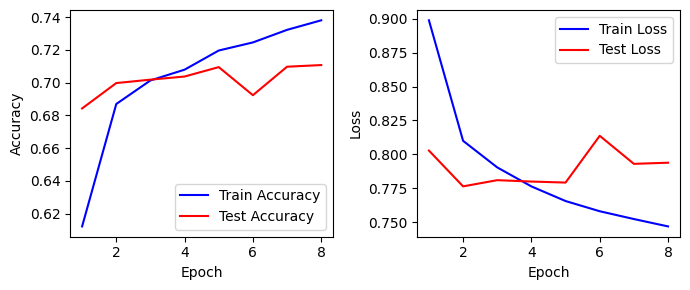

In [ ]:
tuned_model_3_acc2 = tuned_model_3_history.history['accuracy']
tuned_model_3_val_acc = tuned_model_3_history.history['val_accuracy']
tuned_model_3_loss2 = tuned_model_3_history.history['loss']
tuned_model_3_loss2_val_loss = tuned_model_3_history.history['val_loss']

tuned_model_3_epochs = range(1,len(tuned_model_3_acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(tuned_model_3_epochs, tuned_model_3_acc2,'b',label='Train Accuracy')
axes[0].plot(tuned_model_3_epochs, tuned_model_3_val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(tuned_model_3_epochs, tuned_model_3_loss2,'b',label='Train Loss')
axes[1].plot(tuned_model_3_epochs, tuned_model_3_loss2_val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 198ms/step


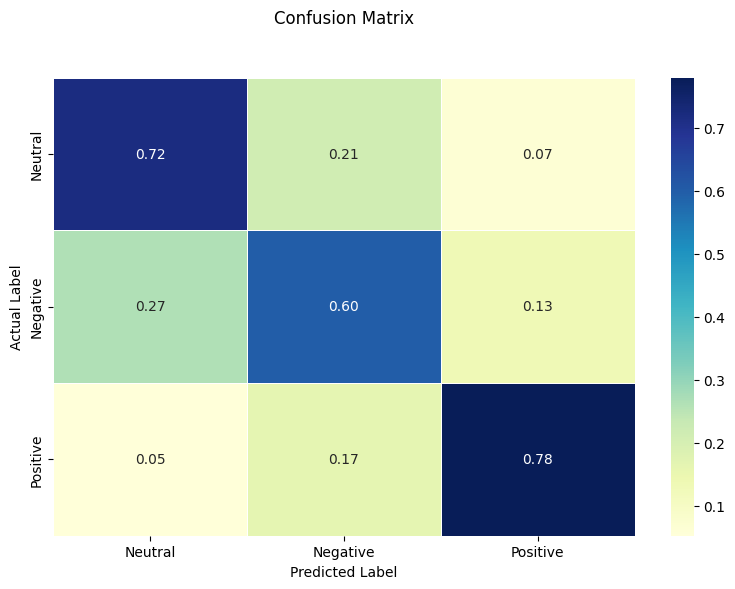

In [ ]:
from sklearn import metrics

# Predicting test set result
pred_prob_test_tuned_model_3 = tuned_model_3.predict(X_test)

# Convert predictions to class labels
pred_tuned_model_3_labels = np.argmax(pred_prob_test_tuned_model_3, axis=1)

# Ensure y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)
cm_test_tuned_model_3 = metrics.confusion_matrix(y_test_labels, pred_tuned_model_3_labels)

# Class names
class_names = ['Neutral', 'Negative', 'Positive']

# Create confusion matrix dataframe
conf_matrix_tuned_model_3 = pd.DataFrame(cm_test_tuned_model_3, index=class_names, columns=class_names)

conf_matrix_normalized_tuned_model_3 = conf_matrix_tuned_model_3.astype('float') / conf_matrix_tuned_model_3.sum(axis=1).to_numpy()[:, np.newaxis]

# Plot heatmap for the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_tuned_model_3, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)

# Formatting the plot
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
target_names = ["Negative", "Neutral", "Positive"]

# Ensure that y_test is in the correct format (class labels)
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions to class labels using argmax
pred_tuned_model_3_labels = np.argmax(pred_prob_test_tuned_model_3, axis=1) # Convert probabilities to labels

# Use predicted labels instead of probabilities
print(classification_report(y_test_labels, pred_tuned_model_3_labels, target_names=target_names)) # Use predicted labels

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.70      3981
     Neutral       0.61      0.60      0.61      4014
    Positive       0.80      0.78      0.79      4005

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 137ms/step


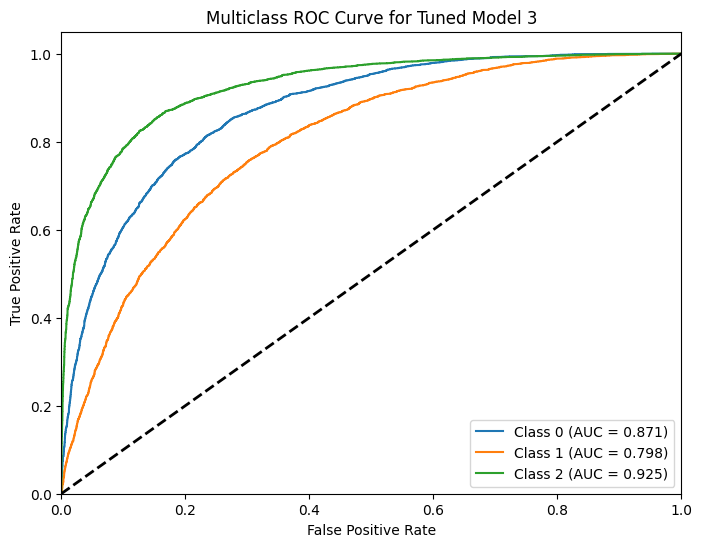

In [ ]:
# ROC Curve
from sklearn.preprocessing import label_binarize

n_classes = 3

# Binarize the labels for One-vs-Rest (OvR)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities using model.predict()
pred_test_tuned_model_3 = tuned_model_3.predict(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_test_tuned_model_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Tuned Model 3')
plt.legend(loc='lower right')
plt.show()